Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 21

In [1]:
num_days_R_prediction=21

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

In [4]:
bypass_weather=1 # =1 bypass weather_pi api calls

### Load Data from Github - John Hopkins Institute 

In [5]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [6]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  13.193900   
238                               NaN                    Laos  19.856270   
239                               NaN                   Libya  26.335100   
240                               NaN      West Bank and Gaza  31.952200   
241                               NaN           Guinea-Bissau  11.803700   
242                               NaN                    Mali  17.570692   
243                               NaN   Saint Kitts and Nevis  17.357822   
244             Northwest Territories                  Canada  64.825500   
245                             Yukon                  Canada  64.282300   
246                               NaN                  Kosovo  42.602636   
247                               NaN                   Burma  21.916200   
248                          Anguilla          United Kingdom  18.220600   
249            British Virgin Islands          United Kingdom  18.420700   
250          Turks and Caicos Islands          United Kingdom  21.694000   
251                               NaN              MS Zaandam   0.000000   
252                               NaN                Botswana -22.328500   
253                               NaN                 Burundi  -3.373100   
254                               NaN            Sierra Leone   8.460555   
255  Bonaire, Sint Eustatius and Saba             Netherlands  12.178400   
256                               NaN                  Malawi -13.25430

## Get Population

In [7]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [8]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
238                               NaN             Timor-Leste  -8.874217   
239                               NaN                  Belize  13.193900   
240                               NaN                    Laos  19.856270   
241                               NaN                   Libya  26.335100   
242                               NaN      West Bank and Gaza  31.952200   
243                               NaN           Guinea-Bissau  11.803700   
244                               NaN                    Mali  17.570692   
245                               NaN   Saint Kitts and Nevis  17.357822   
246             Northwest Territories                  Canada  64.825500   
247                             Yukon                  Canada  64.282300   
248                               NaN                  Kosovo  42.602636   
249                               NaN                   Burma  21.916200   
250                          Anguilla          United Kingdom  18.220600   
251            British Virgin Islands          United Kingdom  18.420700   
252          Turks and Caicos Islands          United Kingdom  21.694000   
253                               NaN              MS Zaandam   0.000000   
254                               NaN                Botswana -22.328500   
255                               NaN                 Burundi  -3.373100   
256                               NaN            Sierra Leone   8.460555   
257  Bonaire, Sint Eustatius and Saba             Netherlands  12.178400   
258                               NaN                  Malawi -13.25430

In [9]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/12/20  \
185        0        0        0        0        0        0  ...      839   
186        0        0        0        0        0        0  ...     1163   
187        0        0        0        0        0        0  ...       14   
188        0        0        0        0        0        0  ...     1002   
189        0        0        0        0        0        0  ...     2116   
190        0        0        0        0        0        0  ...        0   
191        0        0        0        0        0        0  ...        0   
192        0        0        0        0        0        0  ...        0   
193        0        0        0        0        0        0  ...       41   
194        0        0        0        0        0        0  ...      264   

     5/13/20  5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  \
185      861      883      907      915      925      936      948   
186     1175     1184     1190     1203     1218     1231     1247   
187       14       14       14       15       15       15       15   
188     1036     1053     1070     1094     1107     1120     1137   
189     2212     2305     2418     2537     2631     2722     2837   
190        0        0        0        0        0        0        0   
191        0        0        0        0        0        0        0   
192        0        0        0        0        0        0        0   
193       41       41       41       41       41       41       41   
194      273      283      292      302      312      320      329   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187     2,870,256                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193        33,916                        San Marino_nan  
194    34,695,447                      Saudi Arabia_nan  

[10 rows x 125 columns]

In [10]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN              Oman  21.0000   57.0000        0        0   
176            NaN          Pakistan  30.3753   69.3451        0        0   
177            NaN            Panama   8.5380  -80.7821        0        0   
178            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
179            NaN          Paraguay -23.4425  -58.4438        0        0   
180            NaN              Peru  -9.1900  -75.0152        0        0   
181            NaN       Philippines  13.0000  122.0000        0        0   
182            NaN            Poland  51.9194   19.1451        0        0   
183            NaN          Portugal  39.3999   -8.2245        0        0   
184            NaN             Qatar  25.3548   51.1839        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  5/12/20  5/13/20  5/14/20  \
175        0        0        0        0  ...     1250     1289     1303   
176        0        0        0        0  ...     8812     8899     9695   
177        0        0        0        0  ...     6021     6067     6080   
178        0        0        0        0  ...        8        8        8   
179        0        0        0        0  ...      173      182      184   
180        0        0        0        0  ...    23324    24324    25151   
181        0        0        0        0  ...     2106     2251     2337   
182        0        0        0        0  ...     6131     6410     6696   
183        0        0        0        0  ...     3013     3182     3198   
184        0        0        0        0  ...     3019     3143     3356   

     5/15/20  5/16/20  5/17/20  5/18/20  5/19/20   Population   \
175     1350     1436     1465     1496     1574     4,636,000   
176    10880    10880    11341    11922    12489   197,000,000   
177     6080     6080     6081     6081     6194     4,299,739   
178        8        8        8        8        8           NaN   
179      193      198      202      219      230     7,111,652   
180    27147    28272    28621    30306    36524    32,870,710   
181     2460     2561     2635     2729     2843   104,900,000   
182     6918     7175     7451     7628     7903    37,980,000   
183     3328     3822     4636     6430     6431    10,290,000   
184     3546     3788     4370     4899     5634     2,870,256   

                   region  
175              Oman_nan  
176          Pakistan_nan  
177            Panama_nan  
178  Papua New Guinea_nan  
179          Paraguay_nan  
180              Peru_nan  
181       Philippines_nan  
182            Poland_nan  
183          Portugal_nan  
184             Qatar_nan  

[10 rows x 125 columns]

In [11]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/12/20  \
185        0        0        0        0        0        0  ...    16921   
186        0        0        0        0        0        0  ...    27913   
187        0        0        0        0        0        0  ...    25149   
188        0        0        0        0        0        0  ...    15778   
189        0        0        0        0        0        0  ...   232243   
190        0        0        0        0        0        0  ...      286   
191        0        0        0        0        0        0  ...       18   
192        0        0        0        0        0        0  ...       17   
193        0        0        0        0        0        0  ...      638   
194        0        0        0        0        0        0  ...    42925   

     5/13/20  5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  \
185    17204    17615    18016    18257    18529    18885    19268   
186    28132    28319    28583    28810    29036    29209    29432   
187    26539    28272    29425    30972    32604    33969    35606   
188    16002    16247    16437    16704    16871    17036    17191   
189   242271   252245   262843   272043   281752   290678   299941   
190      287      287      287      289      292      297      308   
191       18       18       18       18       18       18       18   
192       17       17       17       17       17       17       17   
193      643      648      652      653      654      654      655   
194    44830    46869    49176    52016    54752    57345    59854   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187     2,870,256                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193        33,916                        San Marino_nan  
194    34,695,447                      Saudi Arabia_nan  

[10 rows x 125 columns]

In [12]:
confirmed.iloc[220:230,:]

Province/State  Country/Region      Lat     Long  1/22/20  1/23/20  \
220   Cayman Islands  United Kingdom  19.3133 -81.2546        0        0   
221  Channel Islands  United Kingdom  49.3723  -2.3644        0        0   
222        Gibraltar  United Kingdom  36.1408  -5.3536        0        0   
223      Isle of Man  United Kingdom  54.2361  -4.5481        0        0   
224       Montserrat  United Kingdom  16.7425 -62.1874        0        0   
225              NaN  United Kingdom  55.3781  -3.4360        0        0   
226              NaN         Uruguay -32.5228 -55.7658        0        0   
227              NaN   United States  37.0902 -95.7129        1        1   
228              NaN      Uzbekistan  41.3775  64.5853        0        0   
229              NaN       Venezuela   6.4238 -66.5897        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  5/12/20  5/13/20  5/14/20  \
220        0        0        0        0  ...       85       86       93   
221        0        0        0        0  ...      547      548      549   
222        0        0        0        0  ...      148      147      147   
223        0        0        0        0  ...      331      332      332   
224        0        0        0        0  ...       11       11       11   
225        0        0        0        0  ...   226463   229705   233151   
226        0        0        0        0  ...      717      719      724   
227        2        2        5        5  ...  1369376  1390406  1417774   
228        0        0        0        0  ...     2519     2612     2645   
229        0        0        0        0  ...      423      423      455   

     5/15/20  5/16/20  5/17/20  5/18/20  5/19/20   Population   \
220       94       94       94       94      111           NaN   
221      549      554      554      555      555       173,519   
222      147      147      147      147      147        33,693   
223      334      335      335      335      335        84,939   
224       11       11       11       11       11         4,991   
225   236711   240161   243695   246406   248818    66,440,000   
226      732      733      734      737      738     3,471,150   
227  1442824  1467820  1486757  1508308  1528568   327,200,000   
228     2686     2738     2753     2791     2855    33,363,556   
229      459      504      541      618      749           NaN   

                             region  
220   United Kingdom_Cayman Islands  
221  United Kingdom_Channel Islands  
222        United Kingdom_Gibraltar  
223      United Kingdom_Isle of Man  
224       United Kingdom_Montserrat  
225              United Kingdom_nan  
226                     Uruguay_nan  
227               United States_nan  
228                  Uzbekistan_nan  
229                   Venezuela_nan  

[10 rows x 125 columns]

## Create Time Series + Plots

In [13]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [14]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [15]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

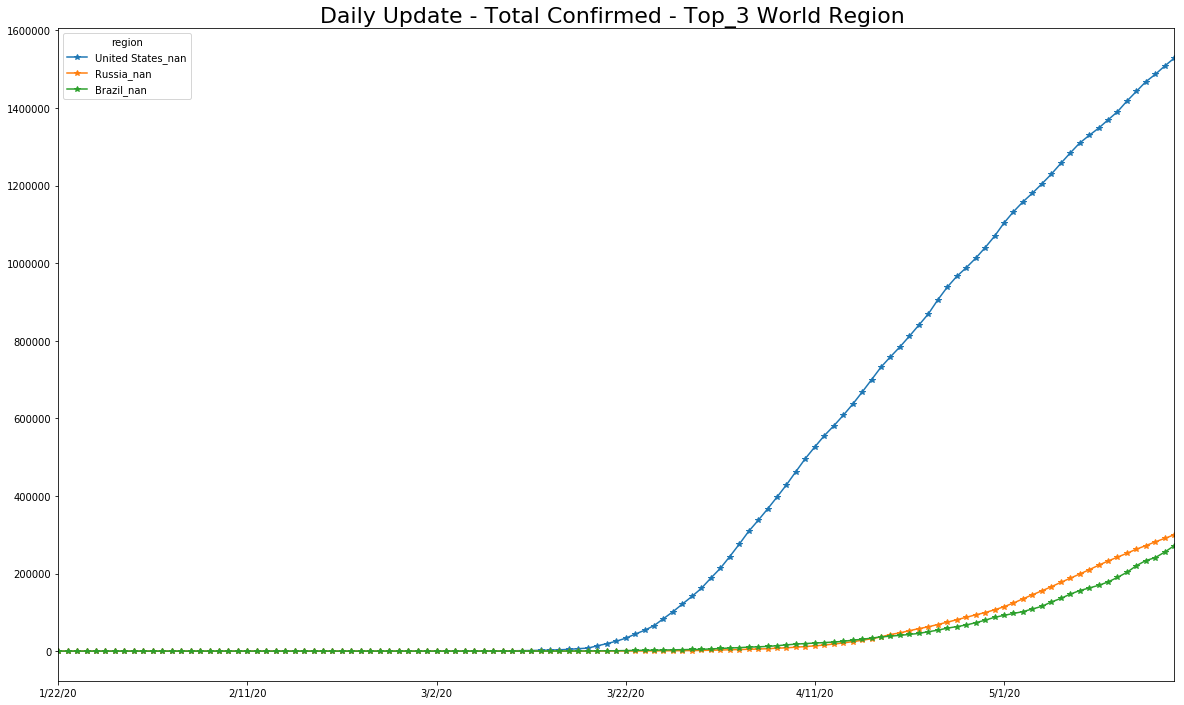

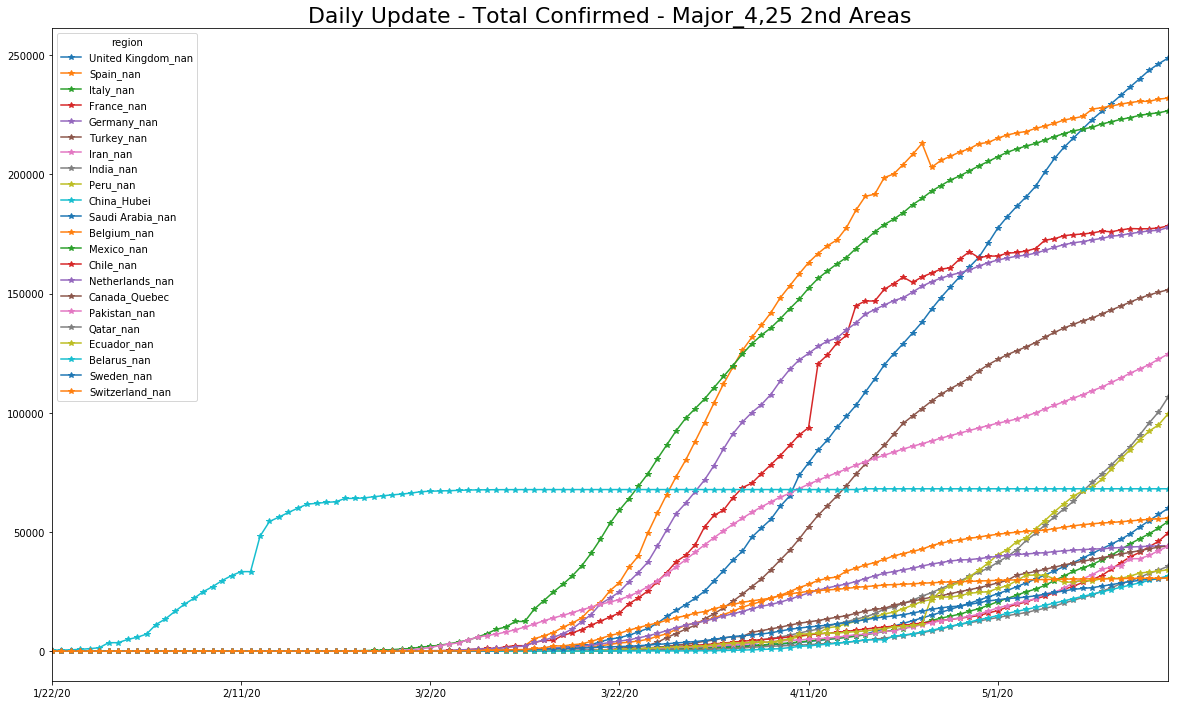

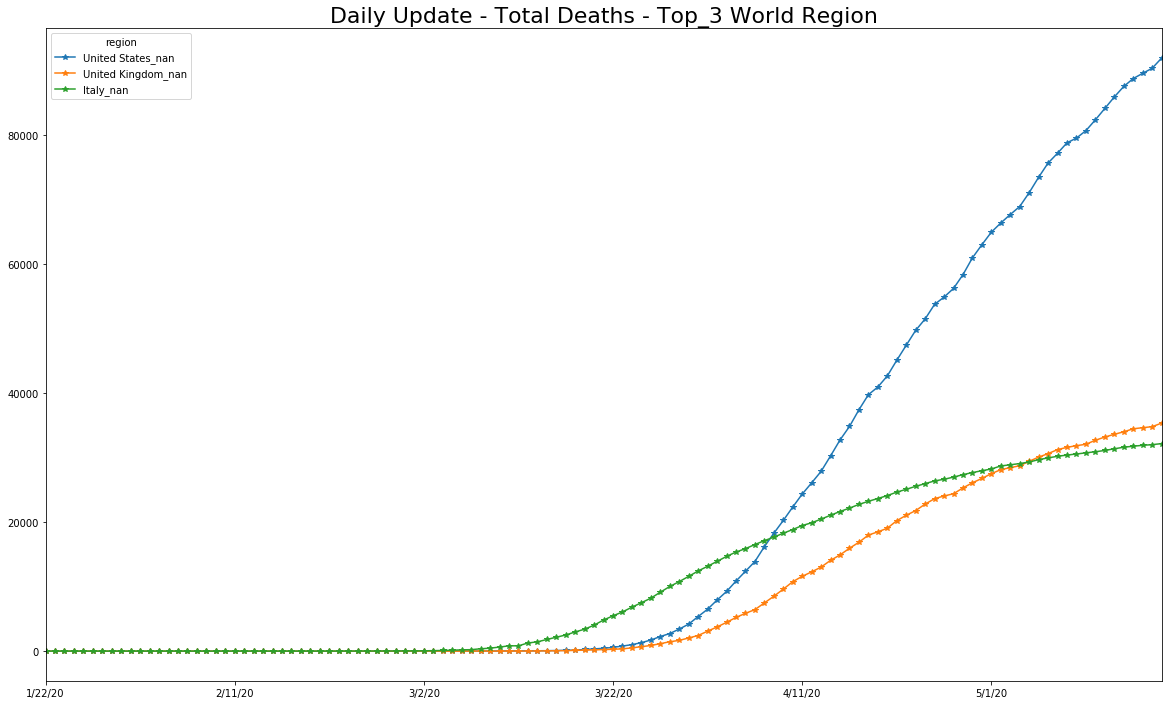

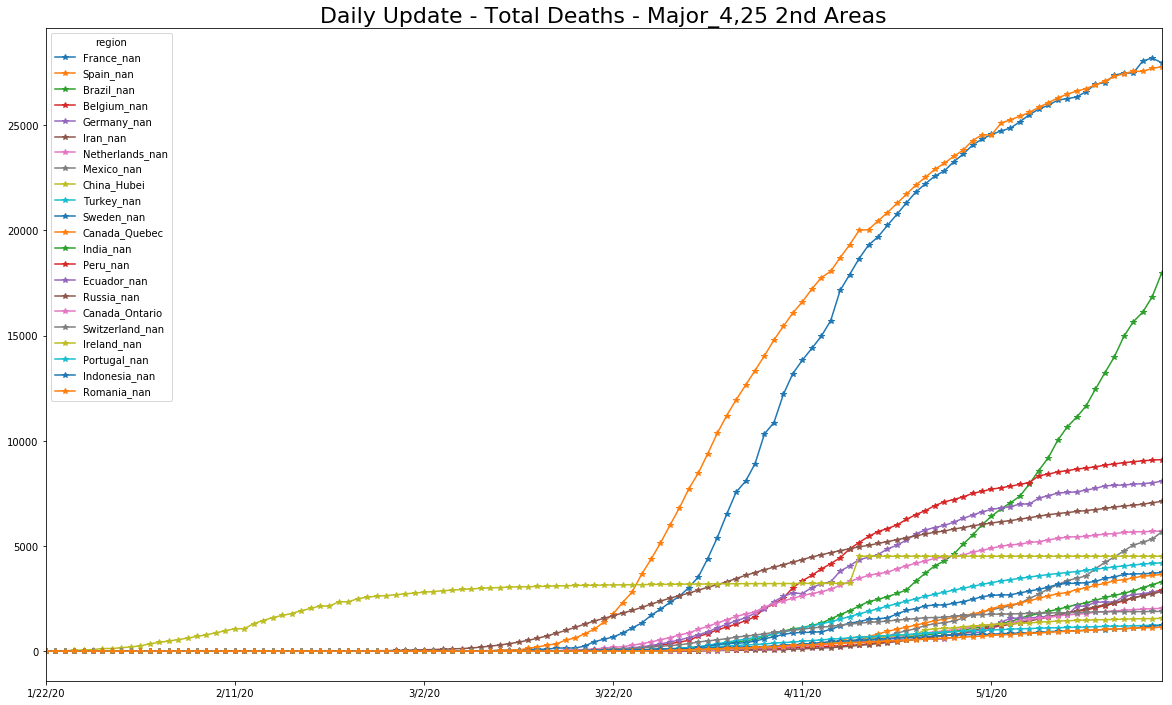

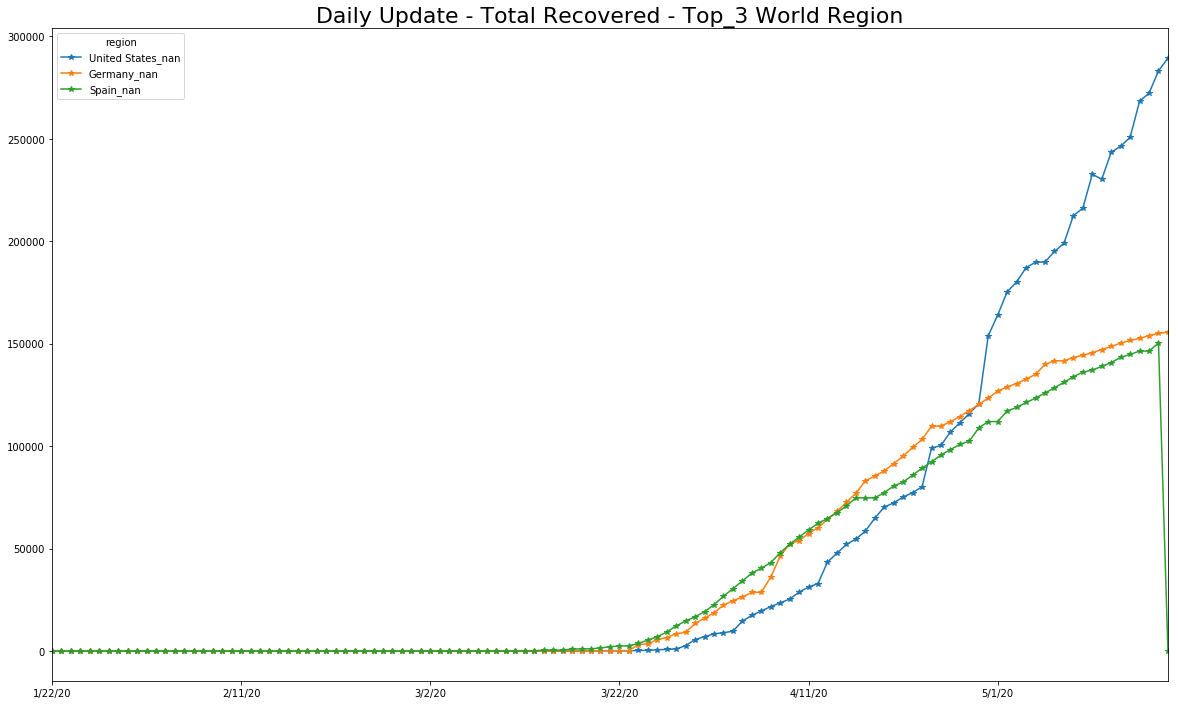

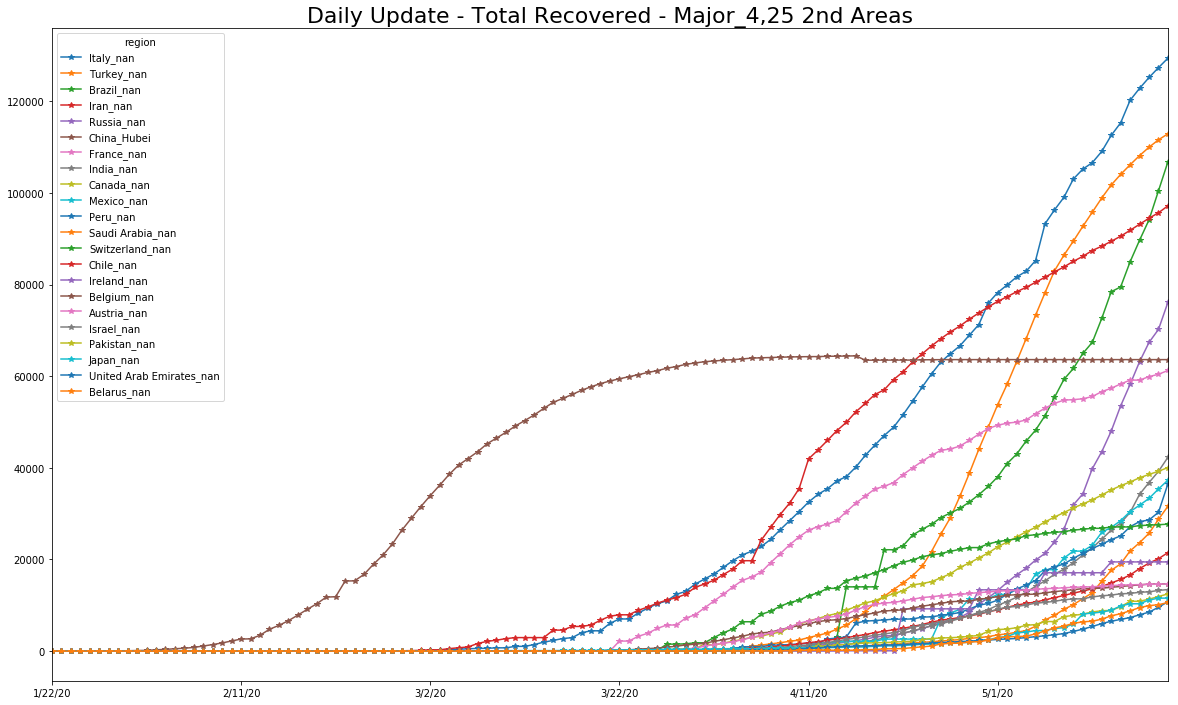

In [16]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [17]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [18]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Taiwan*_nan',
        'Turkey_nan', 
        'Vietnam_nan',
       ]
#

#### Weather History

In [19]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/05/20


In [20]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [21]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [22]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 26/02 as
### they are too in the Past and model no longuer trains in China Hubei only!

ts=ts[35:]
ts_d=ts_d[35:]
ts_rec=ts_rec[35:]

In [23]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
2/26/20                1            0            1            0           0   
2/27/20                1            0            1            0           0   
2/28/20                1            0            1            0           0   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
2/26/20                        0              0            0   
2/27/20                        0              0            0   
2/28/20                        0              0            0   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
2/26/20                                       0                          4   
2/27/20                                       0                          4   
2/28/20                                       0                          4   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
2/26/20  ...                 57            0               0              0   
2/27/20  ...                 58            0               0              0   
2/28/20  ...                 60            0               0              0   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
2/26/20           16                       0                   0          0   
2/27/20           16                       0                   0          0   
2/28/20           16                       0                   0          0   

region   Zambia_nan  Zimbabwe_nan  
2/26/20           0             0  
2/27/20           0             0  
2/28/20           0             0  

[3 rows x 266 columns]

In [24]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
5/16/20             6402          933         6821          761          48   
5/17/20             6664          946         7019          761          48   
5/18/20             7072          948         7201          761          50   
5/19/20             7653          949         7377          761          52   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
5/16/20                       25           7805         4283   
5/17/20                       25           8068         4472   
5/18/20                       25           8371         4823   
5/19/20                       25           8809         5041   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
5/16/20                                     107                       3075   
5/17/20                                     107                       3076   
5/18/20                                     107                       3078   
5/19/20                                     107                       3081   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
5/16/20  ...            1467820          733            2738            504   
5/17/20  ...            1486757          734            2753            541   
5/18/20  ...            1508308          737            2791            618   
5/19/20  ...            1528568          738            2855            749   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
5/16/20          318                     376                   6        122   
5/17/20          320                     381                   6        128   
5/18/20          324                     388                   6        130   
5/19/20          324                     391                   6        167   

region   Zambia_nan  Zimbabwe_nan  
5/16/20         679            42  
5/17/20         753            44  
5/18/20         761            46  
5/19/20         772            46  

[4 rows x 266 columns]

In [25]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [26]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [27]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [28]:
p=%R pred_all

In [29]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [30]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [31]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [32]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [33]:
w_in_model.tail(2)

date       region   min   max
6899 2020-05-10  Vietnam_nan  26.9  33.0
6900 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [34]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [35]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [36]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-02-27  Afghanistan_nan          1             0             0   
2     2020-02-28  Afghanistan_nan          1             0             0   
3     2020-02-29  Afghanistan_nan          1             0             0   
4     2020-03-01  Afghanistan_nan          1             0             0   
5     2020-03-02  Afghanistan_nan          1             0             0   
6     2020-03-03  Afghanistan_nan          1             0             0   
7     2020-03-04  Afghanistan_nan          1             0             0   
8     2020-03-05  Afghanistan_nan          1             0             0   
9     2020-03-06  Afghanistan_nan          1             0             0   
10    2020-03-07  Afghanistan_nan          1             0             0   
11    2020-03-08  Afghanistan_nan          4             0             0   
12    2020-03-09  Afghanistan_nan          4             3             3   
13    2020-03-10  Afghanistan_nan          5             0             3   
14    2020-03-11  Afghanistan_nan          7             1             4   
15    2020-03-12  Afghanistan_nan          7             2             3   
16    2020-03-13  Afghanistan_nan          7             0             3   
17    2020-03-14  Afghanistan_nan         11             0             2   
18    2020-03-15  Afghanistan_nan         16             4             4   
19    2020-03-16  Afghanistan_nan         21             5             9   
20    2020-03-17  Afghanistan_nan         22             5            14   
21    2020-03-18  Afghanistan_nan         22             1            11   
22    2020-03-19  Afghanistan_nan         22             0             6   
23    2020-03-20  Afghanistan_nan         24             0             1   
24    2020-03-21  Afghanistan_nan         24             2             2   
25    2020-03-22  Afghanistan_nan         40             0             2   
26    2020-03-23  Afghanistan_nan         40            16            18   
27    2020-03-24  Afghanistan_nan         74             0            16   
28    2020-03-25  Afghanistan_nan         84            34            50   
29    2020-03-26  Afghanistan_nan         94            10            44   
30    2020-03-27  Afghanistan_nan        110            10            54   
...          ...              ...        ...           ...           ...   
22750 2020-04-21     Zimbabwe_nan         28             0             1   
22751 2020-04-22     Zimbabwe_nan         28             3             3   
22752 2020-04-23     Zimbabwe_nan         28             0             3   
22753 2020-04-24     Zimbabwe_nan         29             0             3   
22754 2020-04-25     Zimbabwe_nan         31             1             1   
22755 2020-04-26     Zimbabwe_nan         31             2             3   
22756 2020-04-27     Zimbabwe_nan         32             0             3   
22757 2020-04-28     Zimbabwe_nan         32             1             3   
22758 2020-04-29     Zimbabwe_nan         32             0             1   
22759 2020-04-30     Zimbabwe_nan         40             0             1   
22760 2020-05-01     Zimbabwe_nan         40             8             8   
22761 2020-05-02     Zimbabwe_nan         34             0             8   
22762 2020-05-03     Zimbabwe_nan         34            -6             2   
22763 2020-05-04     Zimbabwe_nan         34             0            -6   
22764 2020-05-05     Zimbabwe_nan         34             0            -6   
22765 2020-05-06     Zimbabwe_nan         34             0             0   
22766 2020-05-07     Zimbabwe_nan         34             0             0   
22767 2020-05-08     Zimbabwe_nan         34             0             0   
22768 2020-05-09     Zimbabwe_nan         35             0             0   
22769 2020-05-10     Zimbabwe_nan         36             1             1   
22770 2020-05-11     Zimbabwe_nan         36             1  

In [37]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [38]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
22779 2020-05-20  Zimbabwe_nan          0             0             4   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
22779            10         100.021739         109.547619         127.805556   

       last_day  kalman_prediction  population  infected_rate  min  max  
22779        46               48.0    10000000   4.700000e-08  NaN  NaN

In [39]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="Shared -- Ratio in Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage_infected_rate_confirmed']=ratiod['infected_rate']*100
ratiod['population_percentage_factor_9.8_10_infected_rate_confirmed']=ratiod['infected_rate']*100*9.8
ratiod['delta_new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta_new_cases_per_1M_hab']=ratiod['delta_new_cases']/ratiod['population']*1000000

ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)

ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
22777  2020-05-18  Zimbabwe_nan         46             2             7   
22778  2020-05-19  Zimbabwe_nan         46             2             4   
22779  2020-05-20  Zimbabwe_nan          0             0             4   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
22777             8         104.785714         118.945946         122.250000   
22778            10         104.568182         109.547619         127.805556   
22779            10         100.021739         109.547619         127.805556   

       last_day  kalman_prediction  population  infected_rate  min  max  \
22777        44               45.0    10000000   4.500000e-08  NaN  NaN   
22778        46               47.0    10000000   4.700000e-08  NaN  NaN   
22779        46               48.0    10000000   4.700000e-08  NaN  NaN   

       population_percentage_infected_rate_confirmed  \
22777                                       0.000004   
22778                                       0.000005   
22779                                       0.000005   

       population_percentage_factor_9.8_10_infected_rate_confirmed  \
22777                                           0.000044             
22778                                           0.000046             
22779                                           0.000046             

       delta_new_cases  delta_new_cases_per_1M_hab  
22777              1.0                         0.1  
22778              1.0                         0.1  
22779              2.0                         0.2

## Kalman 1 day Prediction with Evaluation

                region           mse           rmse           mae
256  United States_nan  2.874600e+10  169546.448078  23070.214286


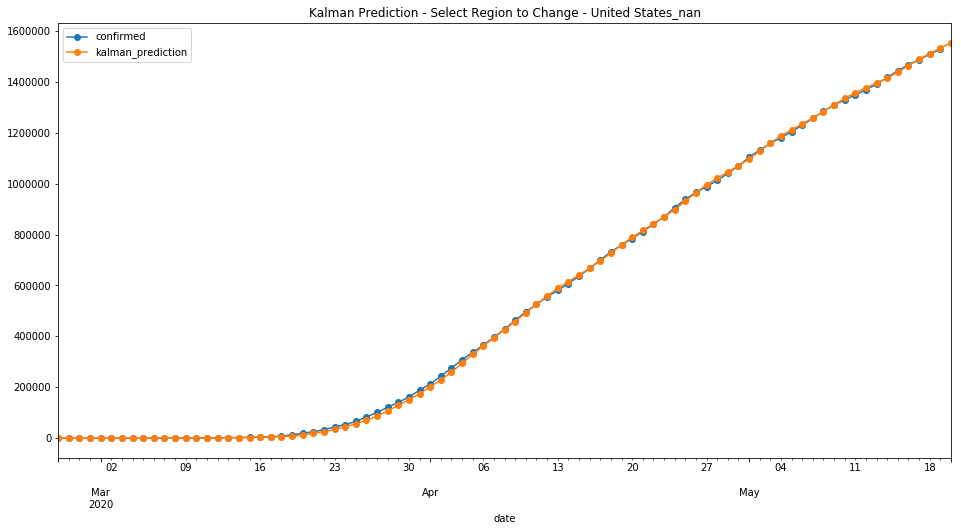

In [40]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse         rmse          mae
208  Russia_nan  1.149400e+09  33902.80156  4728.035714


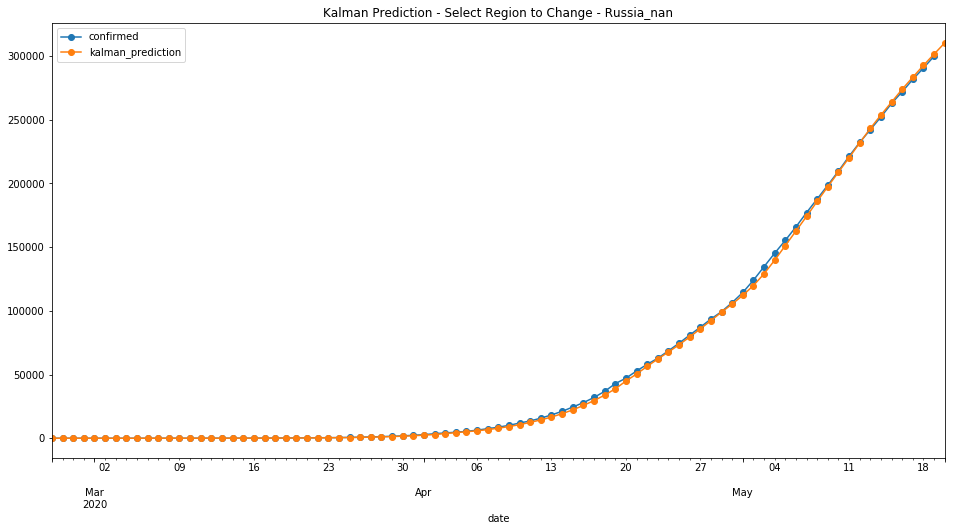

In [41]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse          mae
30  Brazil_nan  9.551922e+08  30906.183183  4615.880952


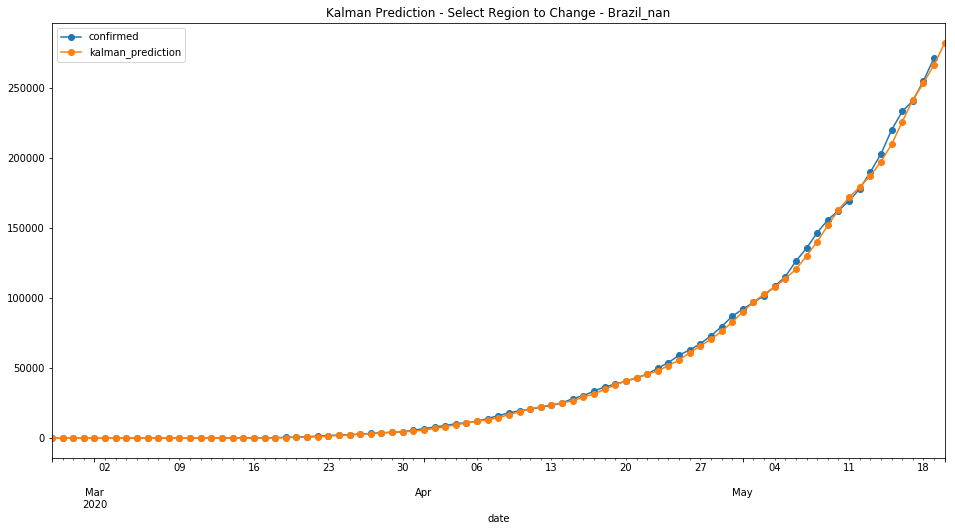

In [42]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse          rmse          mae
255  United Kingdom_nan  7.611995e+08  27589.843315  3882.285714


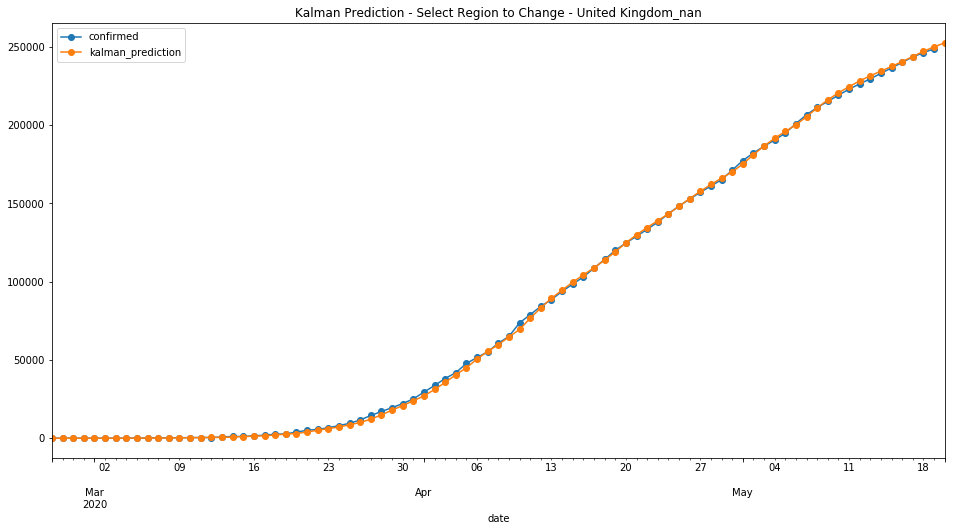

In [43]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [44]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp8sr3hzgw
  JVM stdout: /tmp/tmp8sr3hzgw/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp8sr3hzgw/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         02 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 6 months and 23 days !!!
H2O cluster name:           H2O_from_python_unknownUser_zbap29
H2O cluster total nodes:    1
H2O cluster free memory:    3 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [45]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-56)).strftime('%Y-%m-%d') # 9 weeks =56 days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-03-25
last_train_date= 2020-05-19
first_bootstrap_date= 2020-05-11
boost_bootstrap_date= 2020-05-16
first_test_date= 2020-05-10
last_test_date= 2020-05-20
first_valid_date= 2020-05-18


In [46]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [47]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [48]:
pred2.iloc[:25]

0  confirmed       date           region
0   4721.0       4687 2020-05-11  Afghanistan_nan
1   4976.0       4963 2020-05-12  Afghanistan_nan
2   5287.0       5226 2020-05-13  Afghanistan_nan
3   5537.0       5639 2020-05-14  Afghanistan_nan
4   6011.0       6053 2020-05-15  Afghanistan_nan
5   6425.0       6402 2020-05-16  Afghanistan_nan
6   6772.0       6664 2020-05-17  Afghanistan_nan
7   7021.0       7072 2020-05-18  Afghanistan_nan
8   7490.0       7653 2020-05-19  Afghanistan_nan
9   8131.0          0 2020-05-20  Afghanistan_nan
10   880.0        872 2020-05-11      Albania_nan
11   881.0        876 2020-05-12      Albania_nan
12   886.0        880 2020-05-13      Albania_nan
13   889.0        898 2020-05-14      Albania_nan
14   912.0        916 2020-05-15      Albania_nan
15   929.0        933 2020-05-16      Albania_nan
16   948.0        946 2020-05-17      Albania_nan
17   960.0        948 2020-05-18      Albania_nan
18   959.0        949 2020-05-19      Albania_nan
19   959.0          0 2020-05-20      Albania_nan
20  5939.0       5891 2020-05-11      Algeria_nan
21  6109.0       6067 2020-05-12      Algeria_nan
22  6287.0       6253 2020-05-13      Algeria_nan
23  6475.0       6442 2020-05-14      Algeria_nan
24  6665.0       6629 2020-05-15      Algeria_nan

In [49]:
pred2.iloc[175:195]

0  confirmed       date          region
175  3074.0       3138 2020-05-16  Azerbaijan_nan
176  3271.0       3274 2020-05-17  Azerbaijan_nan
177  3398.0       3387 2020-05-18  Azerbaijan_nan
178  3509.0       3518 2020-05-19  Azerbaijan_nan
179  3649.0          0 2020-05-20  Azerbaijan_nan
180    97.0         93 2020-05-11     Bahamas_nan
181    98.0         93 2020-05-12     Bahamas_nan
182    98.0         94 2020-05-13     Bahamas_nan
183   100.0         96 2020-05-14     Bahamas_nan
184   101.0         96 2020-05-15     Bahamas_nan
185   101.0         96 2020-05-16     Bahamas_nan
186   101.0         96 2020-05-17     Bahamas_nan
187   101.0         96 2020-05-18     Bahamas_nan
188   101.0         96 2020-05-19     Bahamas_nan
189   101.0          0 2020-05-20     Bahamas_nan
190  5166.0       5236 2020-05-11     Bahrain_nan
191  5536.0       5531 2020-05-12     Bahrain_nan
192  5818.0       5816 2020-05-13     Bahrain_nan
193  6120.0       6198 2020-05-14     Bahrain_nan
194  6552.0       6583 2020-05-15     Bahrain_nan

In [50]:
pred2.iloc[220:240]

0  confirmed       date       region
220  23903.0      23906 2020-05-11  Belarus_nan
221  24836.0      24873 2020-05-12  Belarus_nan
222  25815.0      25825 2020-05-13  Belarus_nan
223  26766.0      26772 2020-05-14  Belarus_nan
224  27720.0      27730 2020-05-15  Belarus_nan
225  28685.0      28681 2020-05-16  Belarus_nan
226  29636.0      29650 2020-05-17  Belarus_nan
227  30612.0      30572 2020-05-18  Belarus_nan
228  31510.0      31508 2020-05-19  Belarus_nan
229  32455.0          0 2020-05-20  Belarus_nan
230  53454.0      53449 2020-05-11  Belgium_nan
231  53792.0      53779 2020-05-12  Belgium_nan
232  54088.0      53981 2020-05-13  Belgium_nan
233  54201.0      54288 2020-05-14  Belgium_nan
234  54557.0      54644 2020-05-15  Belgium_nan
235  54910.0      54989 2020-05-16  Belgium_nan
236  55256.0      55280 2020-05-17  Belgium_nan
237  55520.0      55559 2020-05-18  Belgium_nan
238  55779.0      55791 2020-05-19  Belgium_nan
239  55973.0          0 2020-05-20  Belgium_nan

In [51]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [52]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data',model_v2.r2(valid=True))

# MSE on the training data =  7386264.950099514
# MSE on the validation data =  25451309358.85246
# R^2 on the training data =  0.9997056823089221
# R^2 on the validation data 0.4565586084615867


In [53]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1589962921705_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 7386264.950099514
RMSE: 2717.7683768304305
MAE: 444.68121509049087
RMSLE: 0.4160920471697359
Mean Residual Deviance: 7386264.950099514

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 25451309358.85246
RMSE: 159534.66506954675
MAE: 38233.7081075672
RMSLE: 5.870923478375204
Mean Residual Deviance: 25451309358.85246
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2020-05-20 08:22:10  0.085 sec   0.0                nan                 nan                 nan                  nan                 nan                 nan
     2020-05-20 08:22:10  0.461 sec   1.0                7144.625939137098   1518.6982455004465  51045679.810190655   160849.31258816348  38229.15340866816   25872501360.084724
     2020-05-20 08:22:11  0.586 sec   2.0                5927.371827806119   1305.13871365949    35133736.78506965    161138.9198163072   38272.35778808594   25965751479.566277
     2020-05-20 08:22:11  0.708 sec   3.0                5674.117639063467   1235.2686372754126  32195610.981931172   161581.53623319833  38590.659160311254  26108592851.48039
     2020-05-20 08:22:11  0.804 sec   4.0                5796.600874378144   1165.908306228152   33600581.69684146    161364.95162323833  38497.4272030785    26038647612.37005
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2020-05-20 08:22:18  8.165 sec   123.0              2759.636512497806   485.4097403587464   7615593.681111053    159632.791391797    38273.329009494344  25482628087.53698
     2020-05-20 08:22:22  12.206 sec  238.0              2770.550212303572   471.17509792306697  7675948.47889537     159524.8206712353   38278.85867964281   25448168410.189785
     2020-05-20 08:22:26  16.222 sec  352.0              2845.438726444806   456.29210763842656  8096521.545951839    159636.43238677096  38265.4758498616    25483790545.176098
     2020-05-20 08:22:30  20.225 sec  452.0              2733.207655160096   443.60677922738995  7470424.086225749    159589.71352606153  38252.88635924861   25468876663.330383
     2020-05-20 08:22:32  22.119 sec  500.0              2717.7683768304305  444.68121509049087  7386264.950099514    159534.66506954675  38233.7081075672    25451309358.85246


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
kalman_prediction  1.38814e+16            1                    0.35728
last_day           1.06271e+16            0.765564             0.27352
7_day_change       5.16913e+15            0.372377             0.133043
3_day_change       4.6519e+15             0.335116             0.11973
1_day_change       1.98493e+15            0.142992             0.0510881
region             1.00575e+15            0.0724527            0.0258859
infected_rate      9.29859e+14            0.0669858            0.0239326
3_day_change_rate  1.92124e+14            0.0138403            0.00494486
1_day_change_rate  1.91386e+14            0.0137872            0.00492588
7_day_change_rate  1.65723e+14            0.0119385            0.00426536
min                3.46117e+13            0.00249338           0.000890834
max                1.91795e+13            0.00138167           0.000493642

In [54]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         1.388144e+16           1.000000    0.357280
1            last_day         1.062714e+16           0.765564    0.273520
2        7_day_change         5.169126e+15           0.372377    0.133043
3        3_day_change         4.651896e+15           0.335116    0.119730
4        1_day_change         1.984935e+15           0.142992    0.051088
5              region         1.005748e+15           0.072453    0.025886
6       infected_rate         9.298590e+14           0.066986    0.023933
7   3_day_change_rate         1.921236e+14           0.013840    0.004945
8   1_day_change_rate         1.913859e+14           0.013787    0.004926
9   7_day_change_rate         1.657229e+14           0.011938    0.004265
10                min         3.461172e+13           0.002493    0.000891
11                max         1.917955e+13           0.001382    0.000494

In [55]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


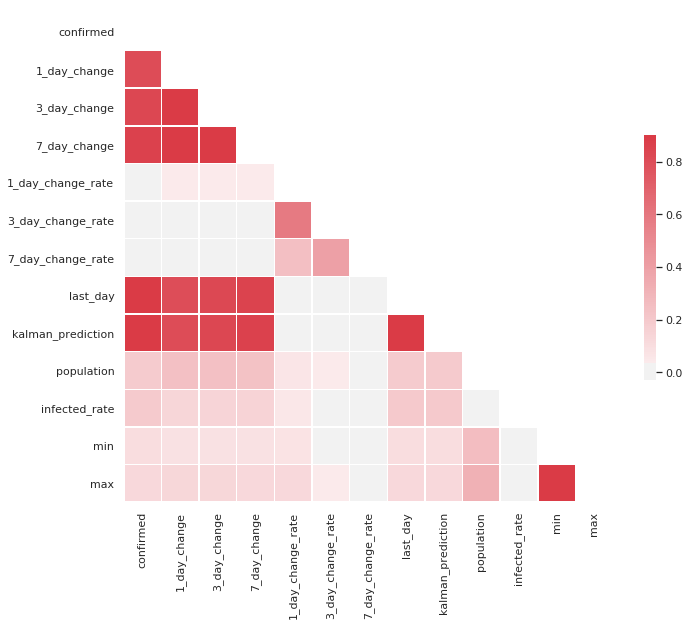

In [56]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [57]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.810353
3_day_change         0.832930
7_day_change         0.856993
1_day_change_rate    0.027382
3_day_change_rate    0.000158
7_day_change_rate   -0.012208
last_day             0.975257
kalman_prediction    0.975809
population           0.192144
infected_rate        0.195043
min                  0.099377
max                  0.122324
Name: confirmed, dtype: float64


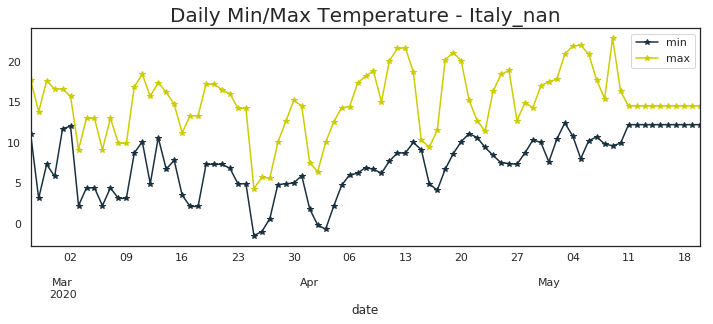

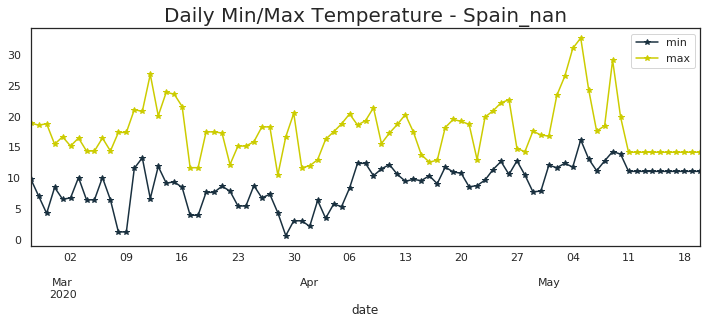

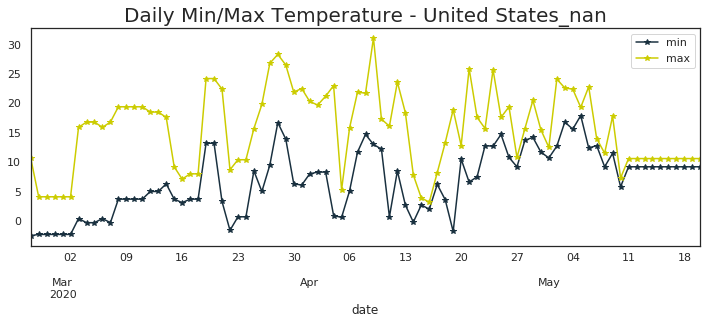

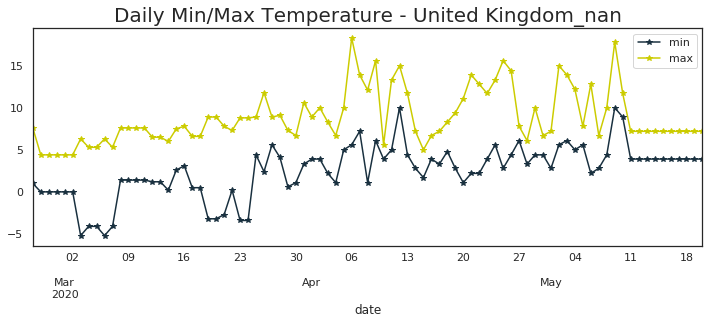

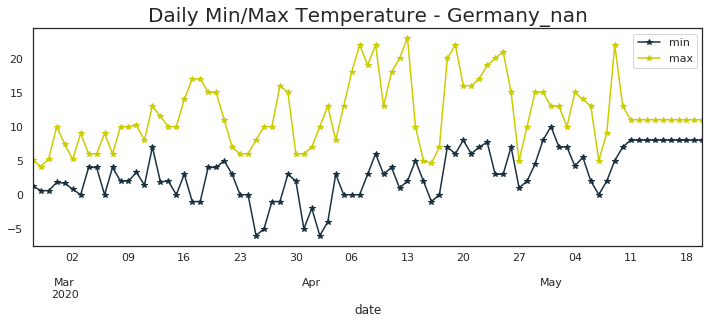

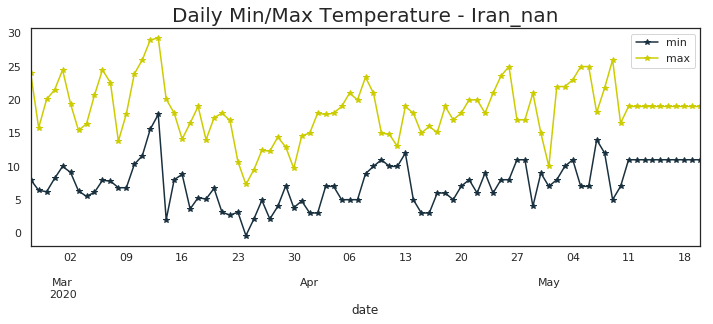

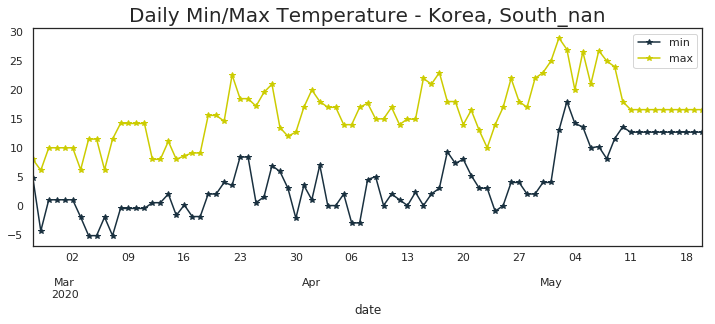

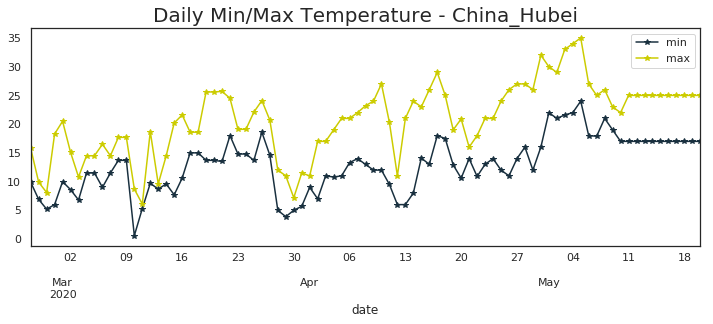

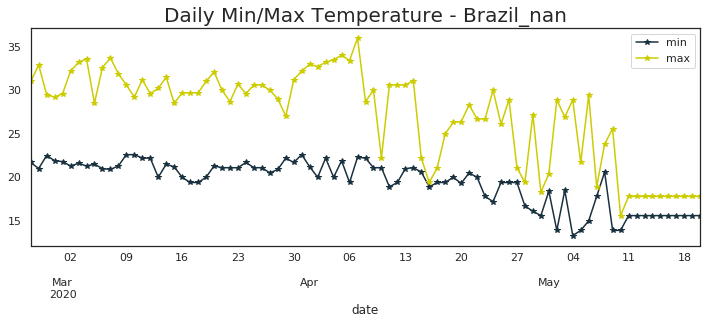

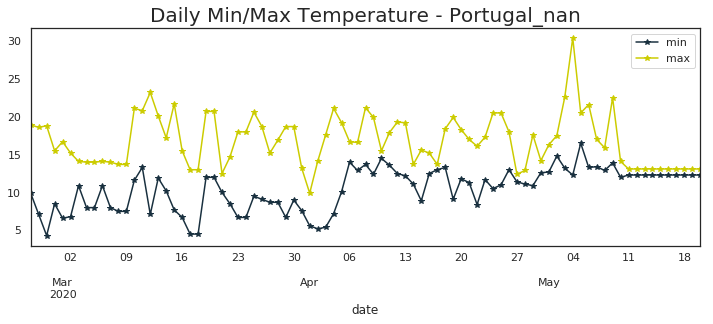

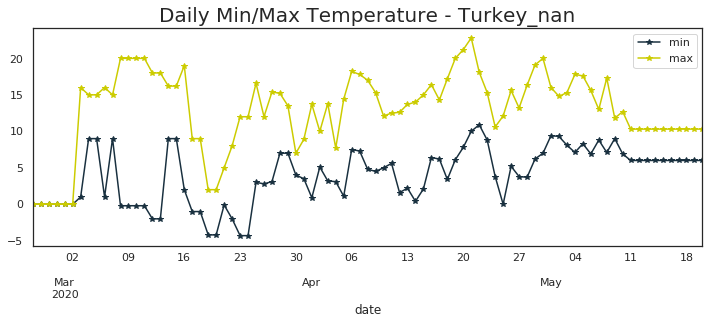

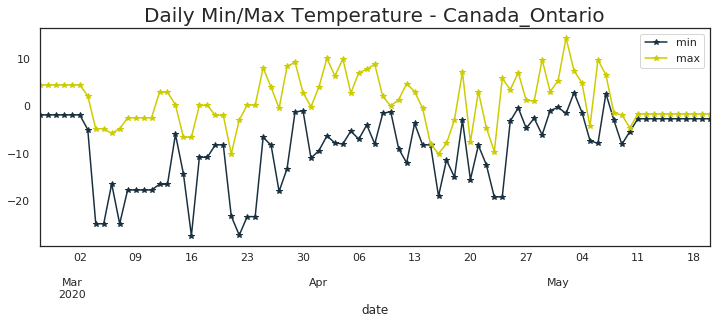

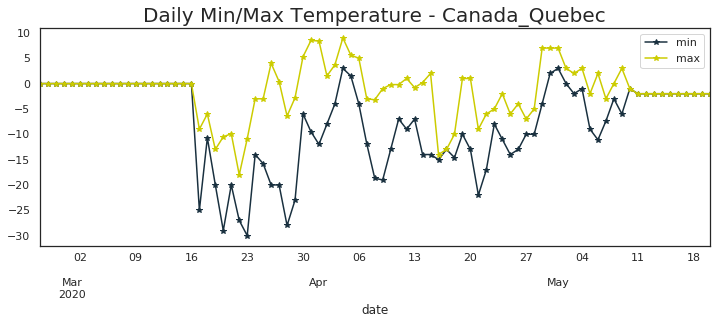

In [58]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [59]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.9  31.1
Russia_nan                  13.0  30.0
Brazil_nan                  22.6  36.0
United Kingdom_nan          10.0  18.3
Spain_nan                   16.2  32.7
Italy_nan                   12.4  22.9
France_nan                  14.2  23.8
Germany_nan                 10.0  23.0
Turkey_nan                  10.9  22.8
Iran_nan                    17.8  29.3
India_nan                   30.0  43.0
Peru_nan                     0.0   0.0
China_Hubei                 24.0  35.0
Saudi Arabia_nan             0.0   0.0
Belgium_nan                 17.8  26.1
Mexico_nan                   0.0   0.0
Chile_nan                    0.0   0.0
Netherlands_nan             15.6  26.1
Canada_Quebec                3.0   9.0
Pakistan_nan                15.0  23.7
Qatar_nan                    0.0   0.0
Ecuador_nan                  0.0   0.0
Belarus_nan                 

### Kalman X Days Ahead Prediction

In [60]:
%%R

#install.packages('reshape')

NULL


In [61]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [62]:
all_new=%R all_new

In [63]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

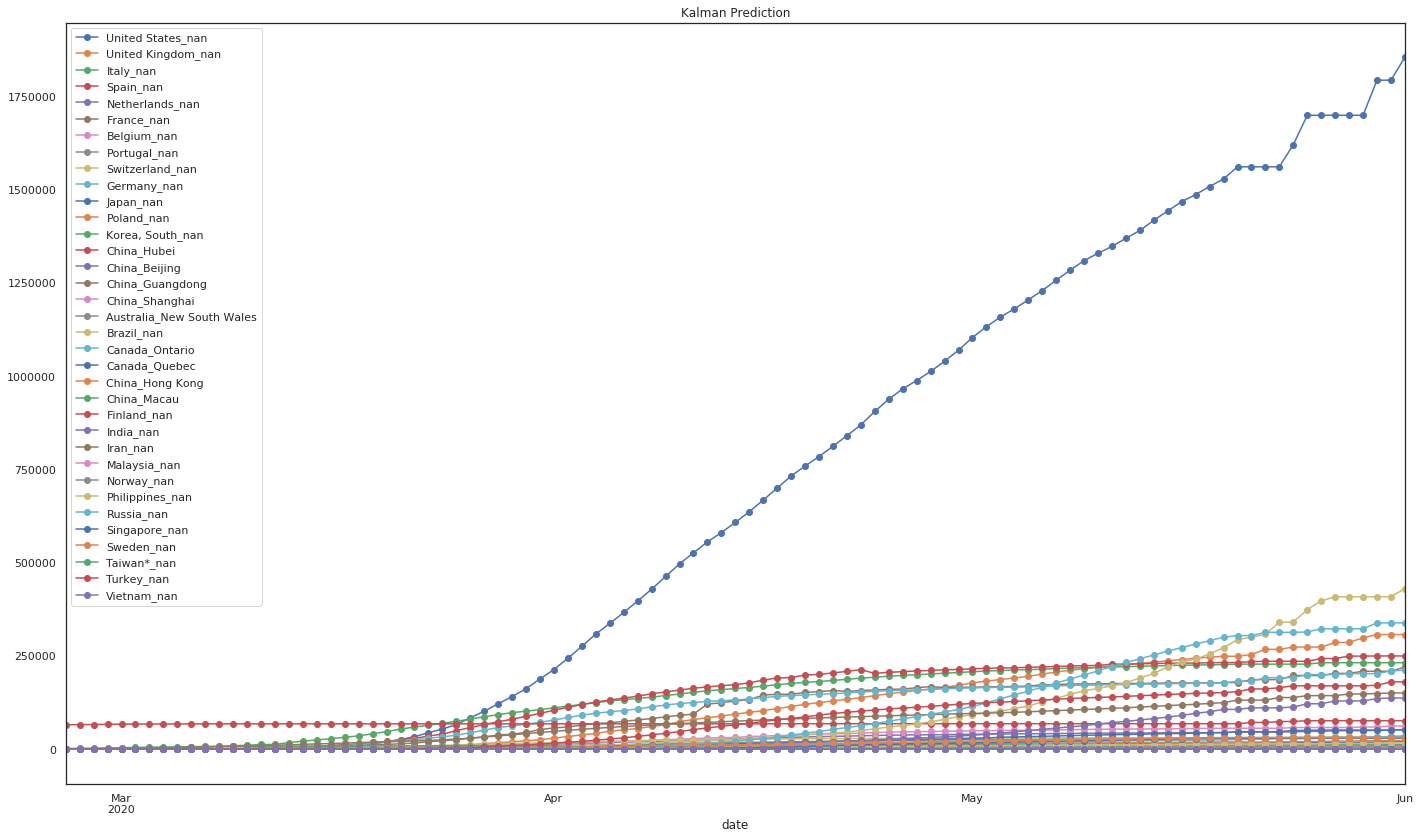

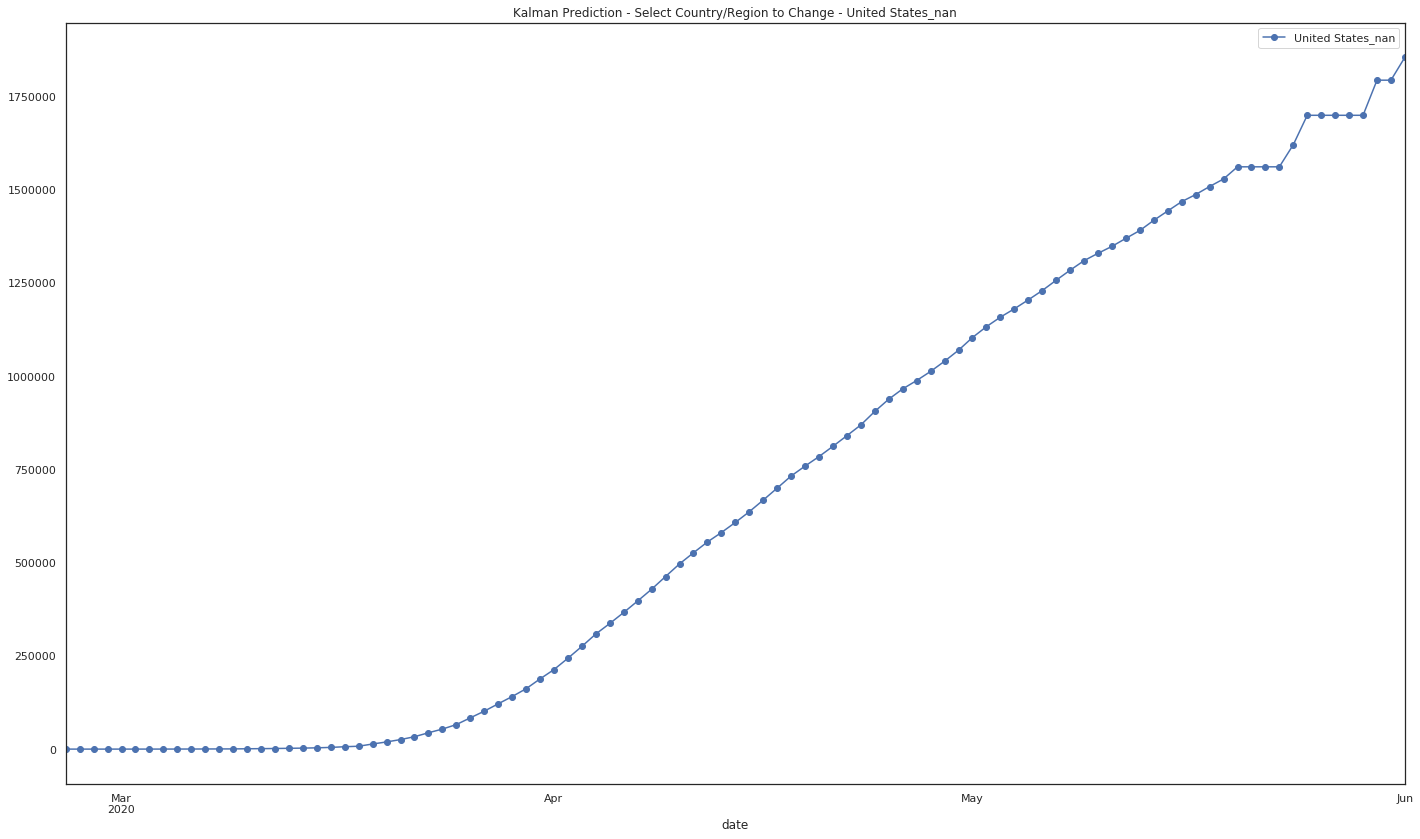

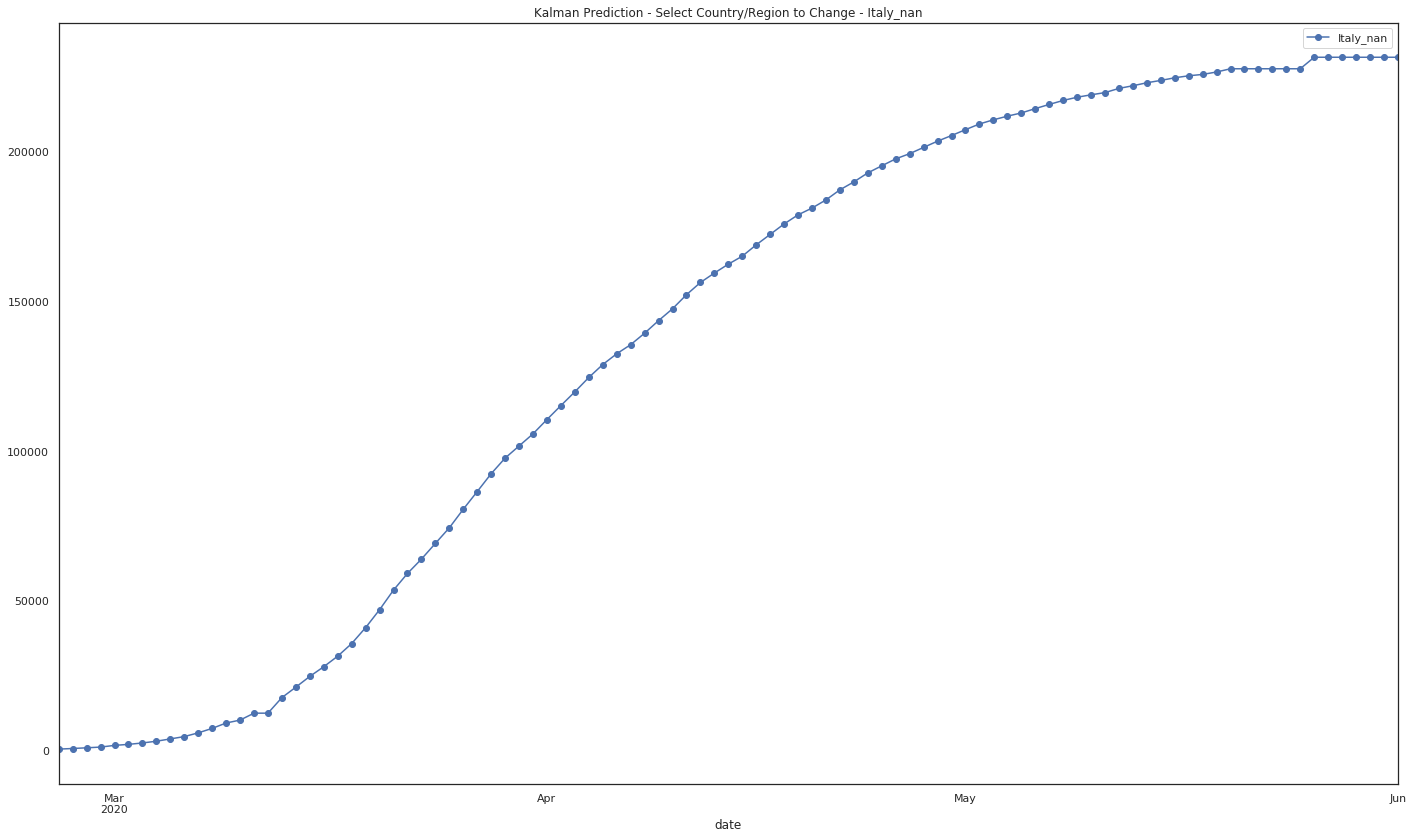

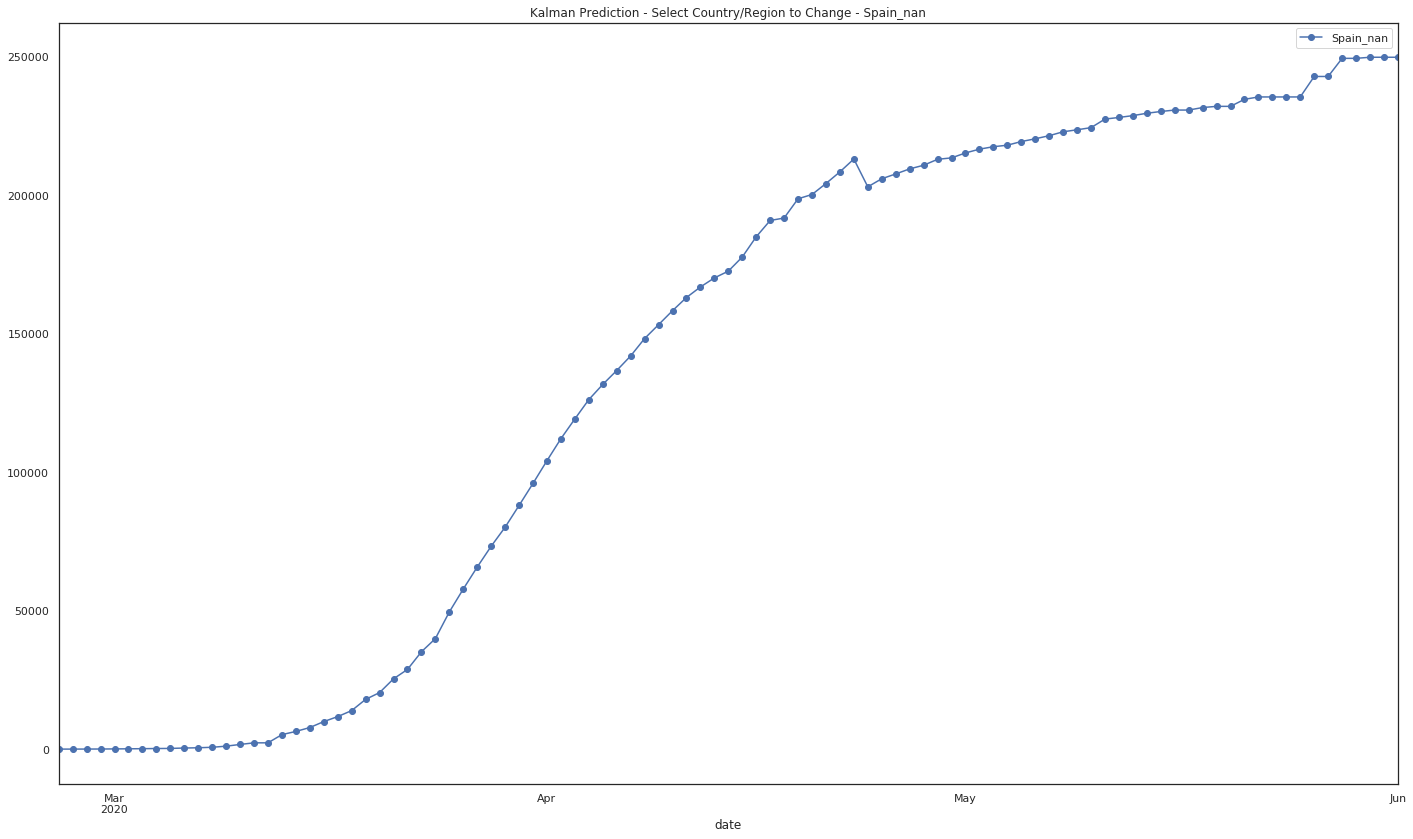

In [64]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


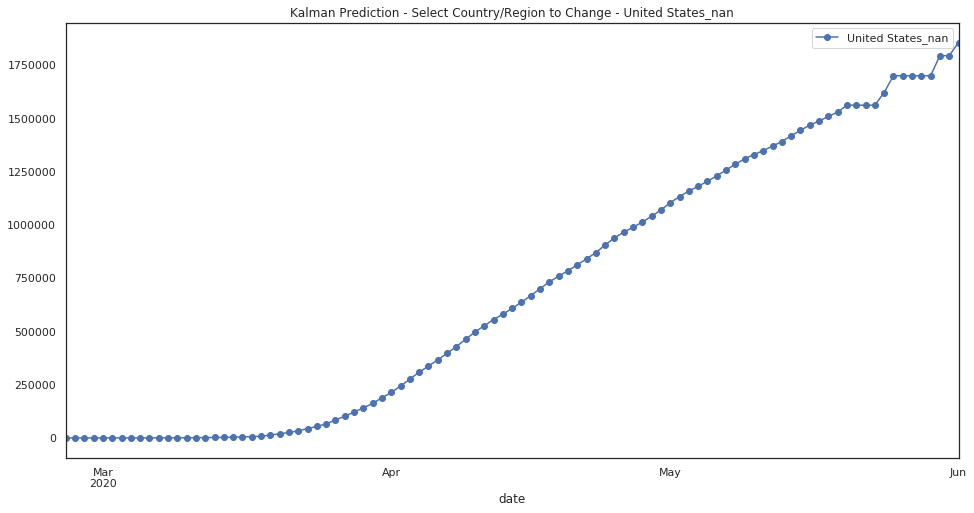

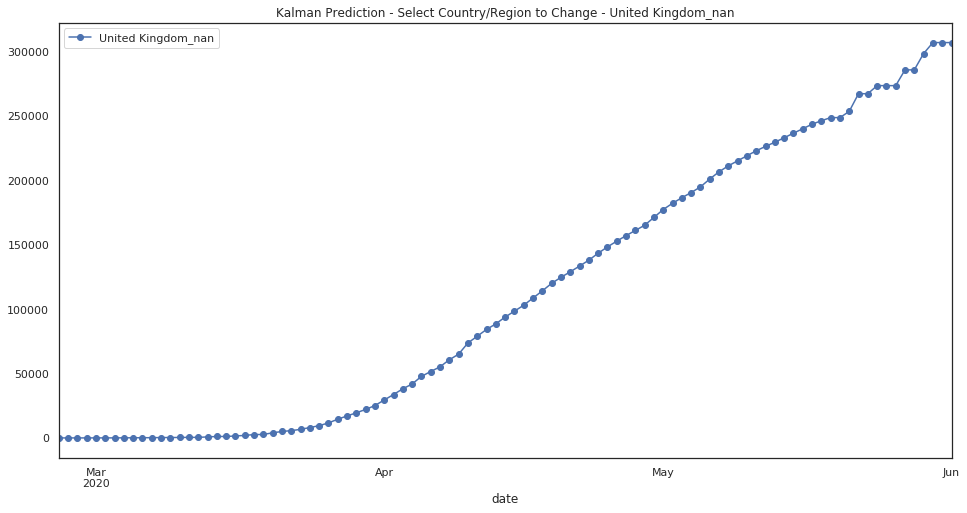

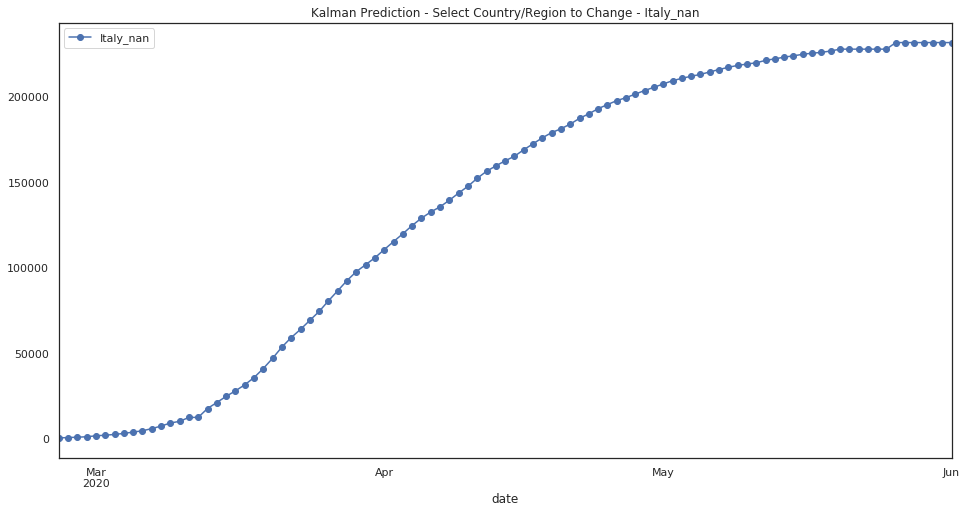

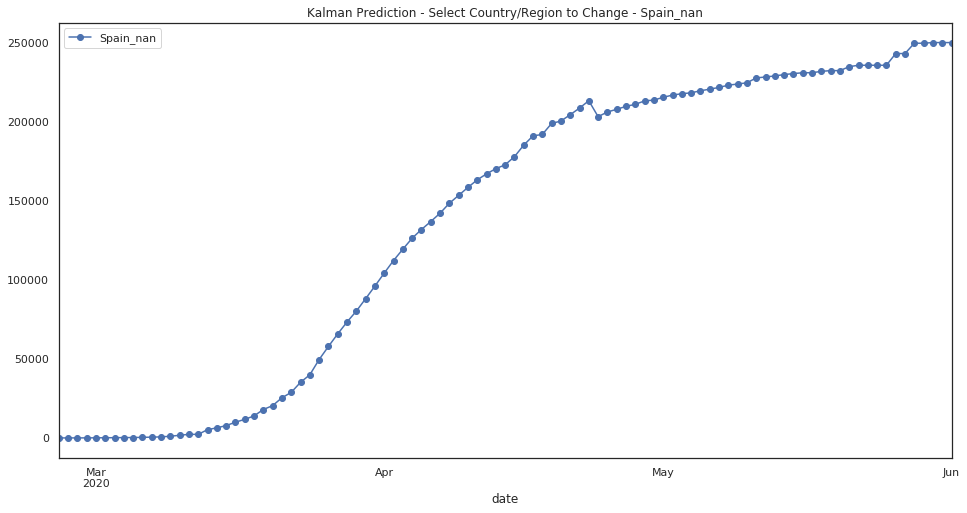

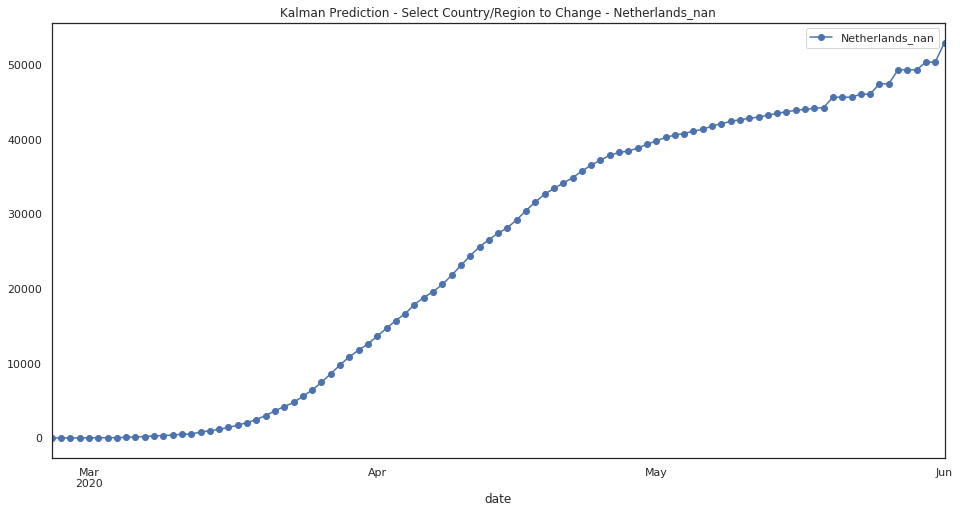

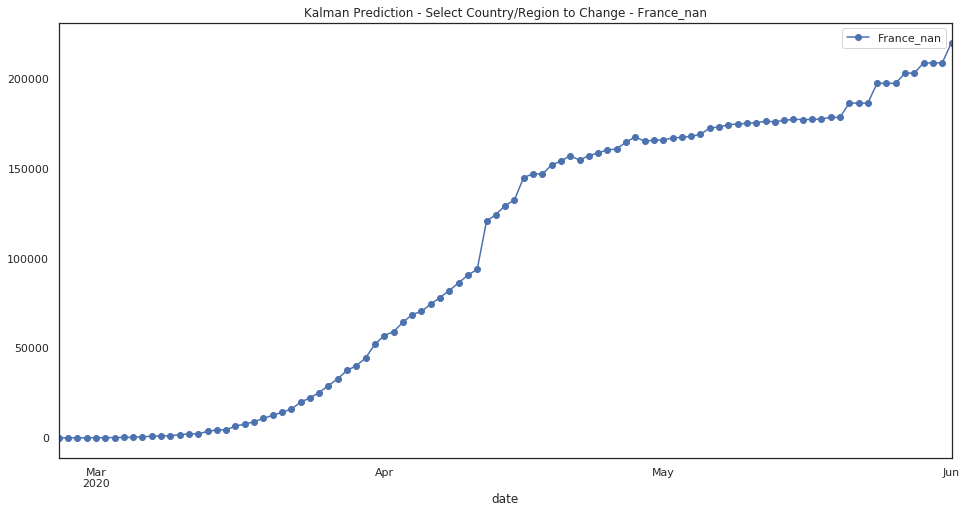

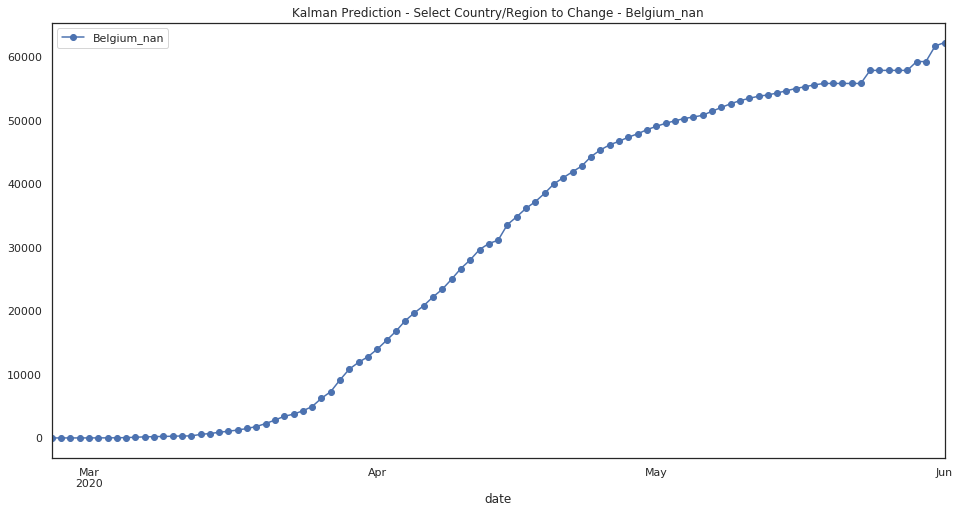

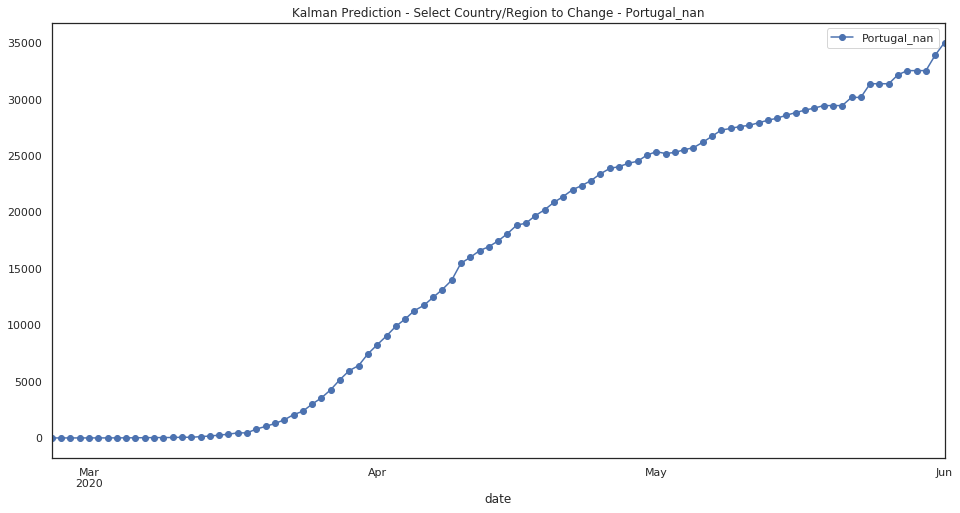

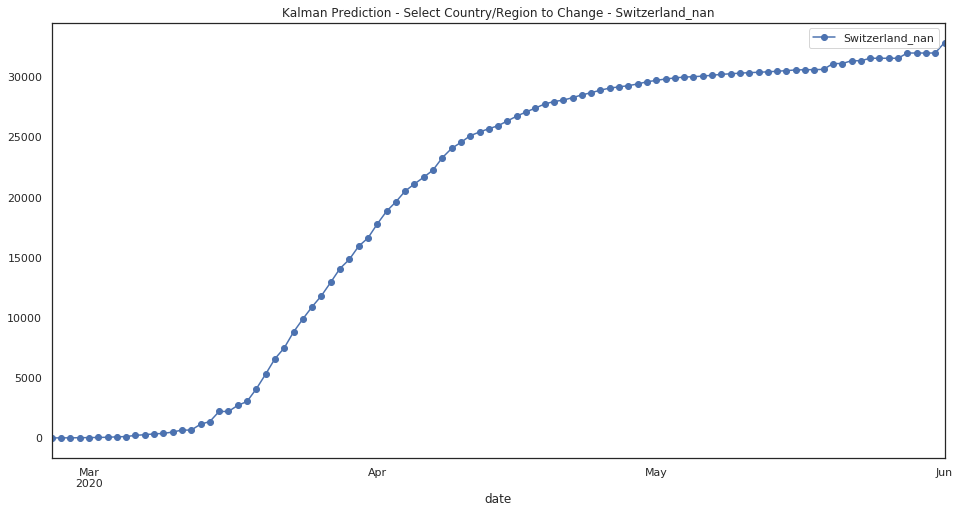

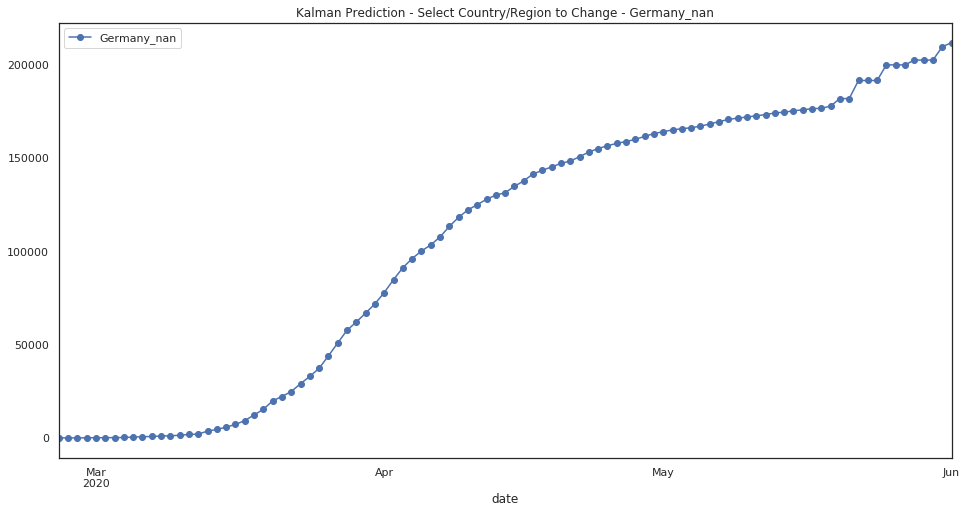

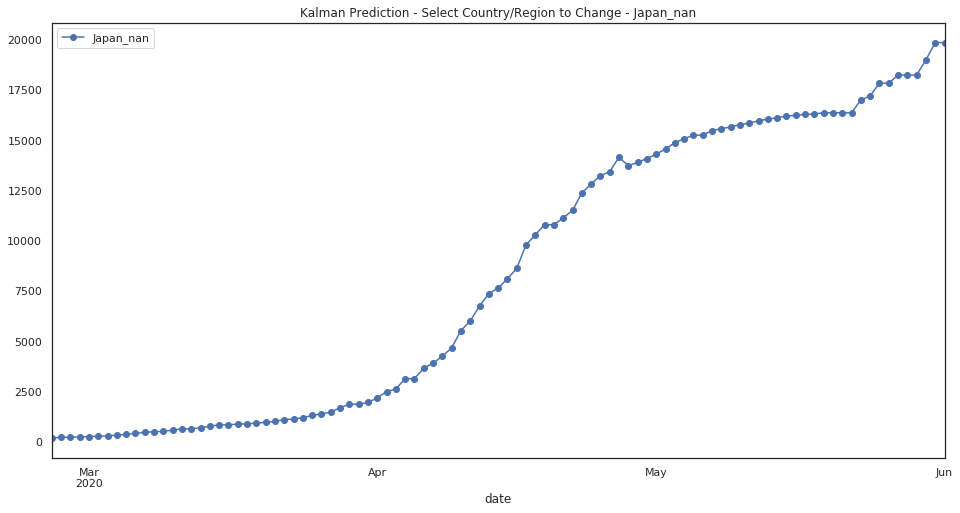

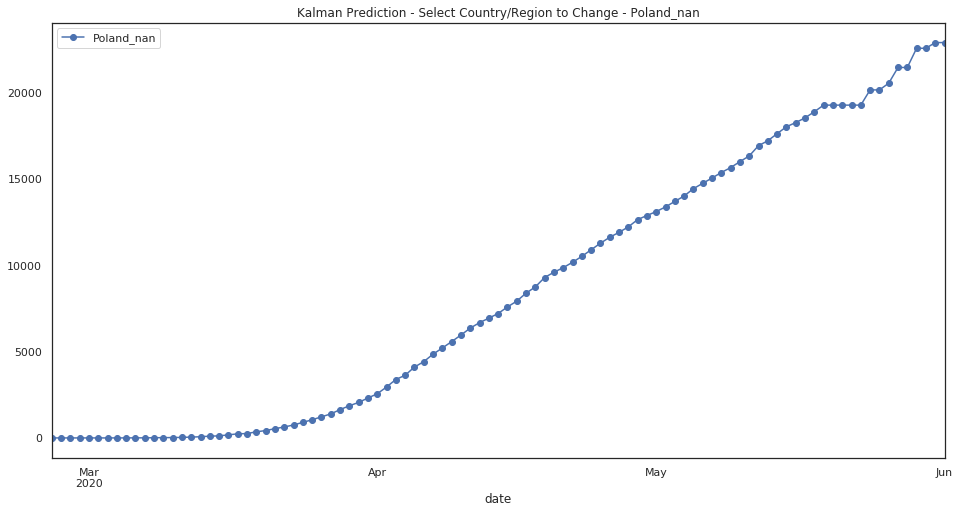

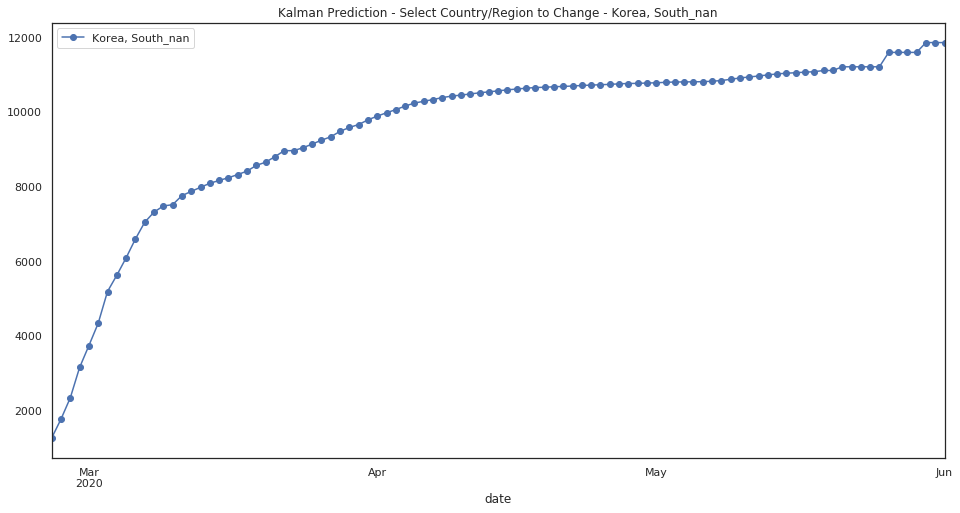

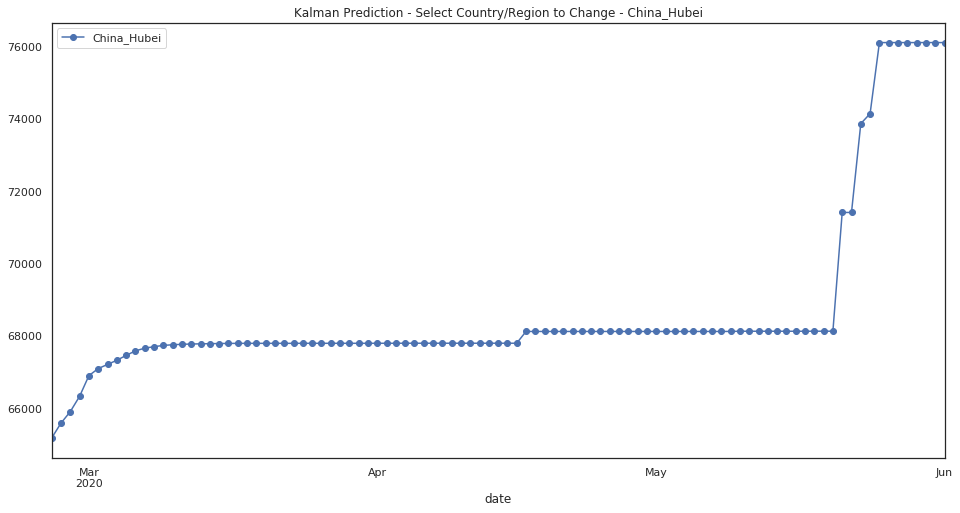

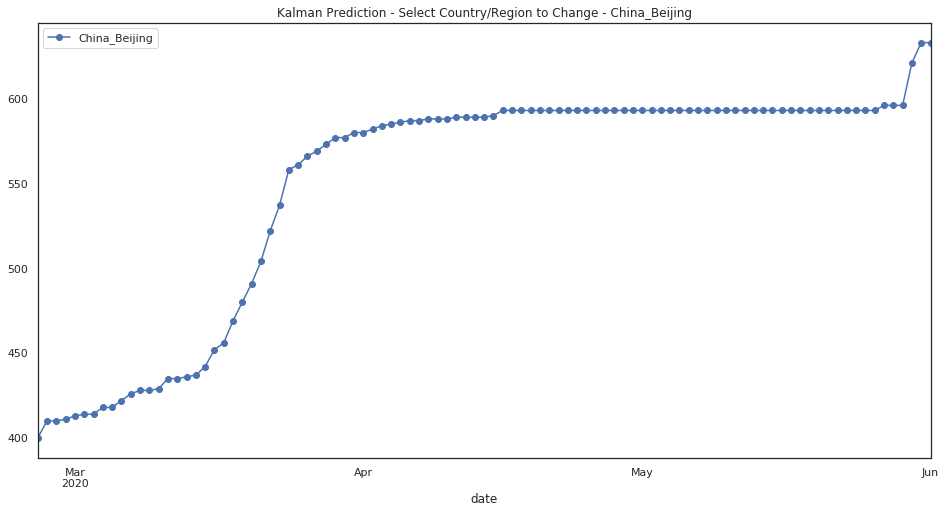

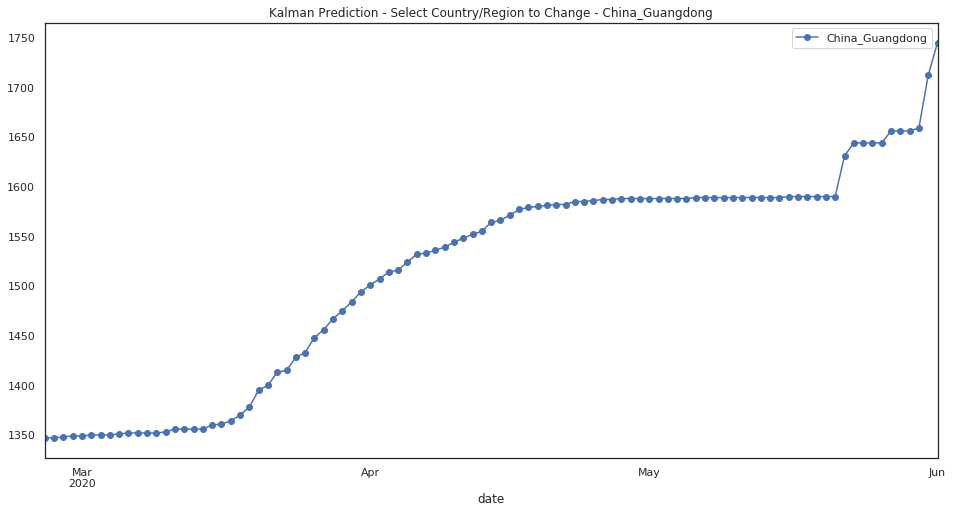

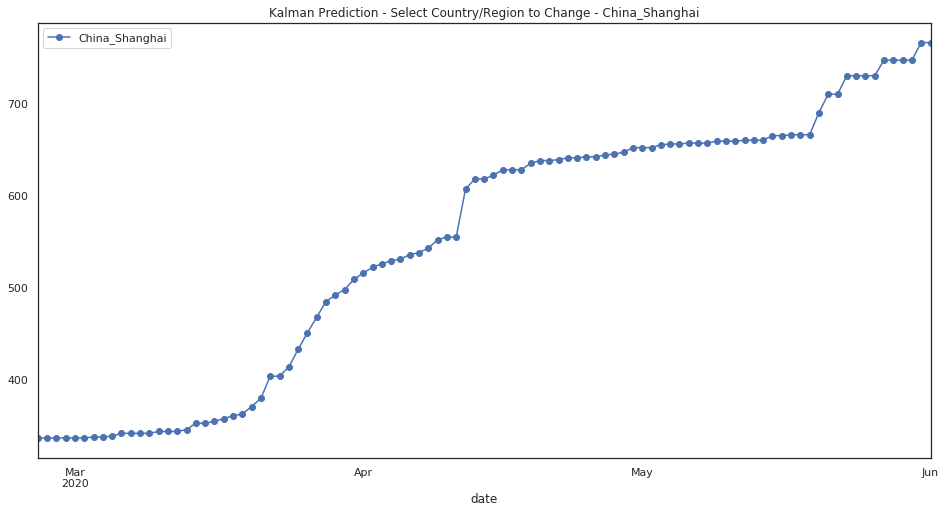

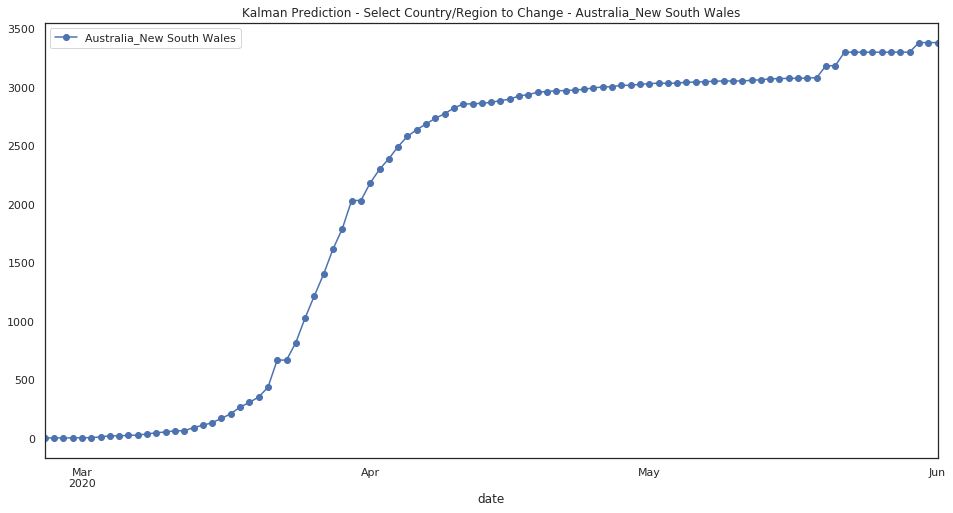

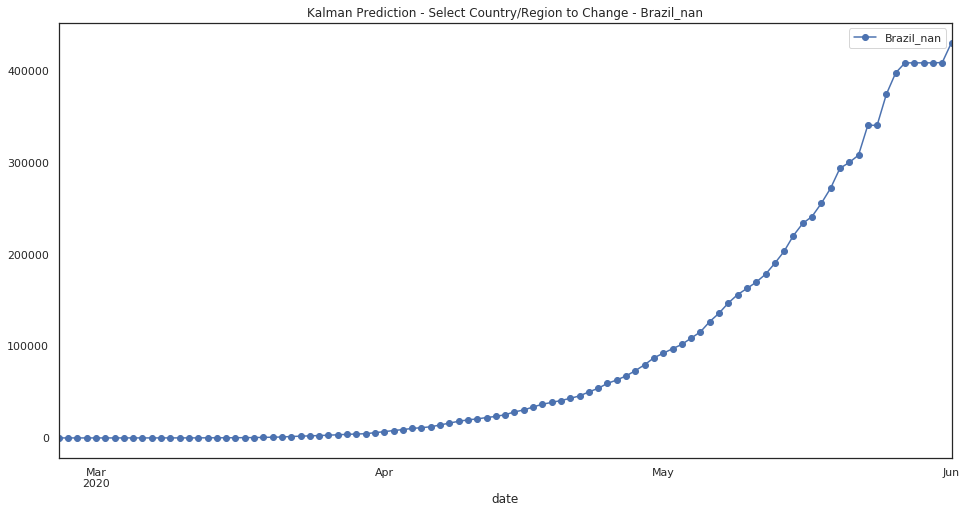

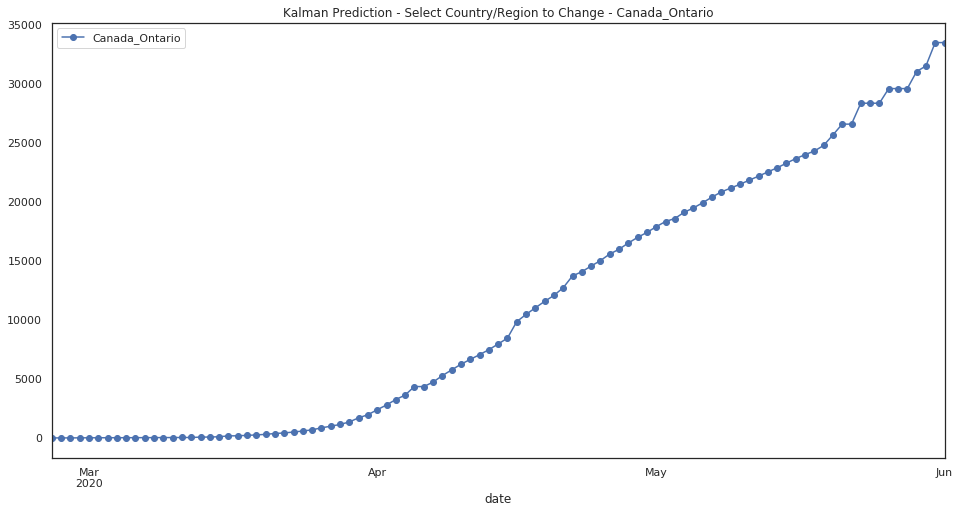

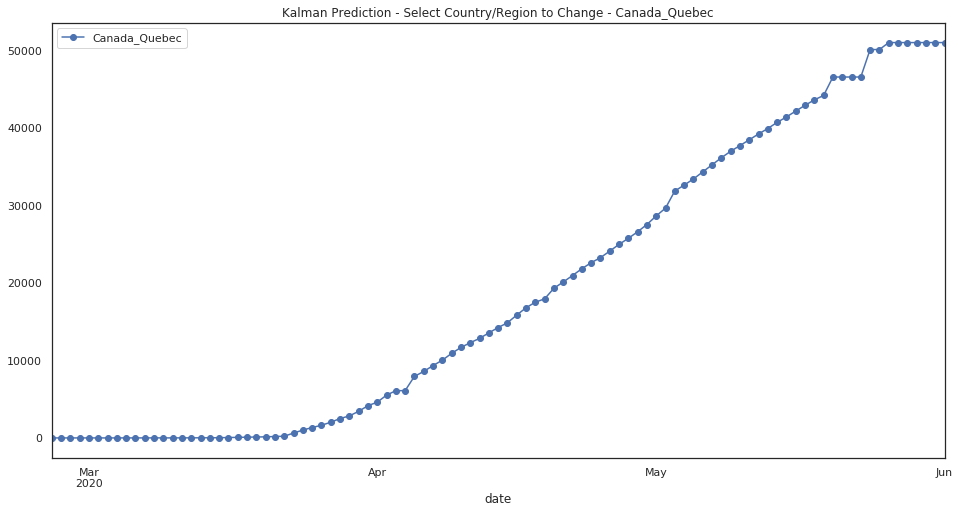

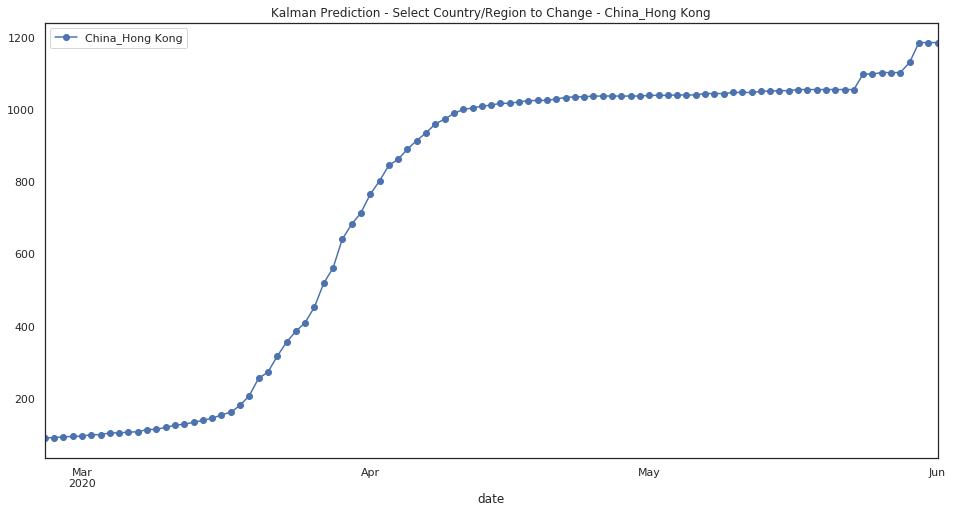

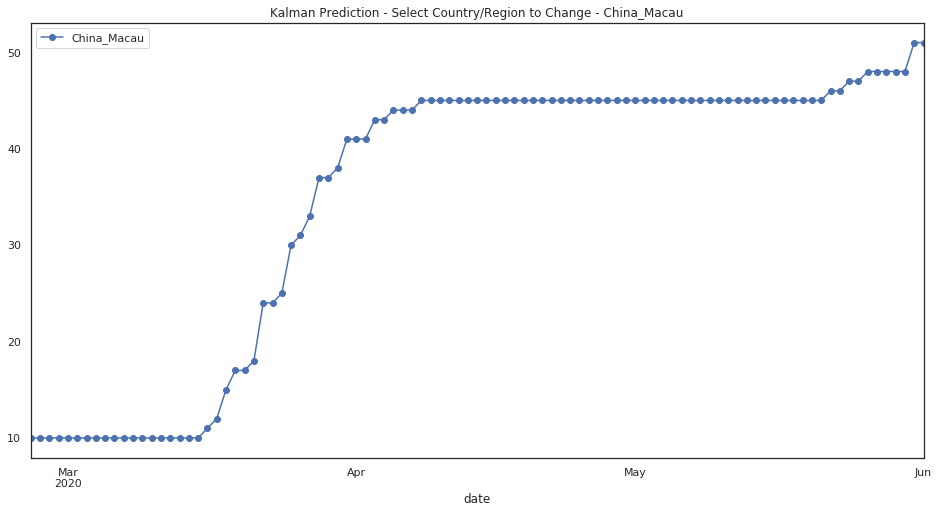

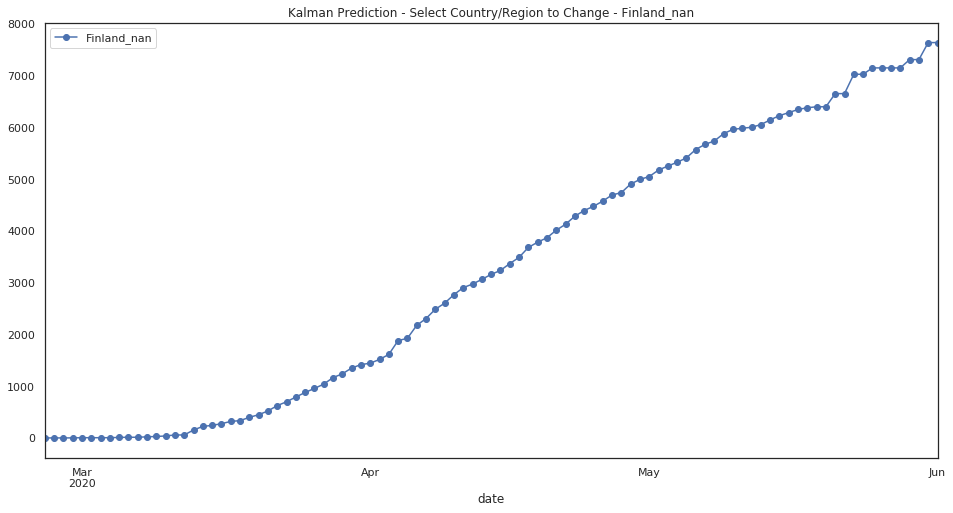

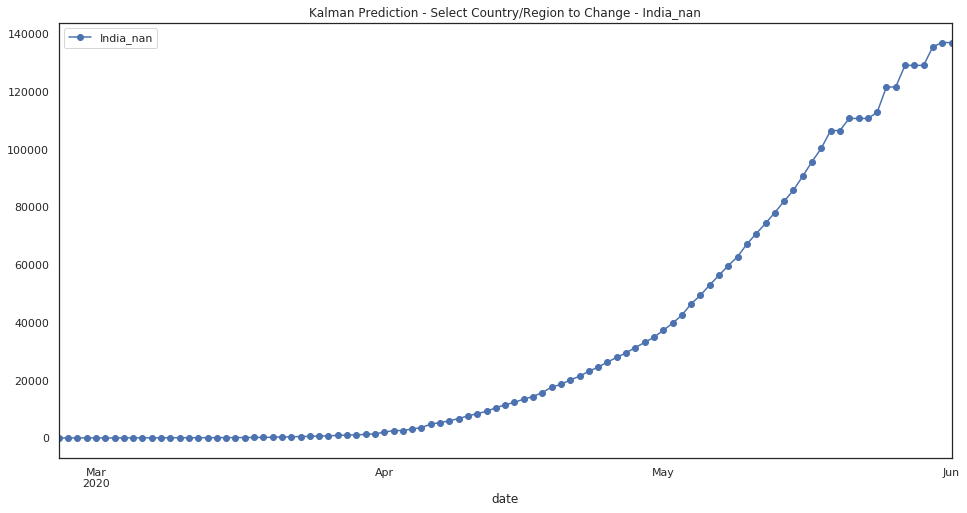

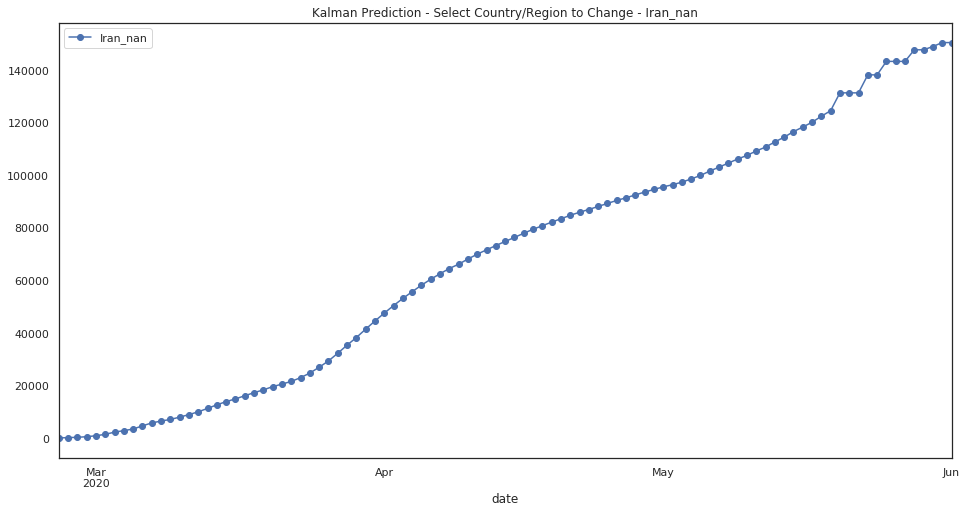

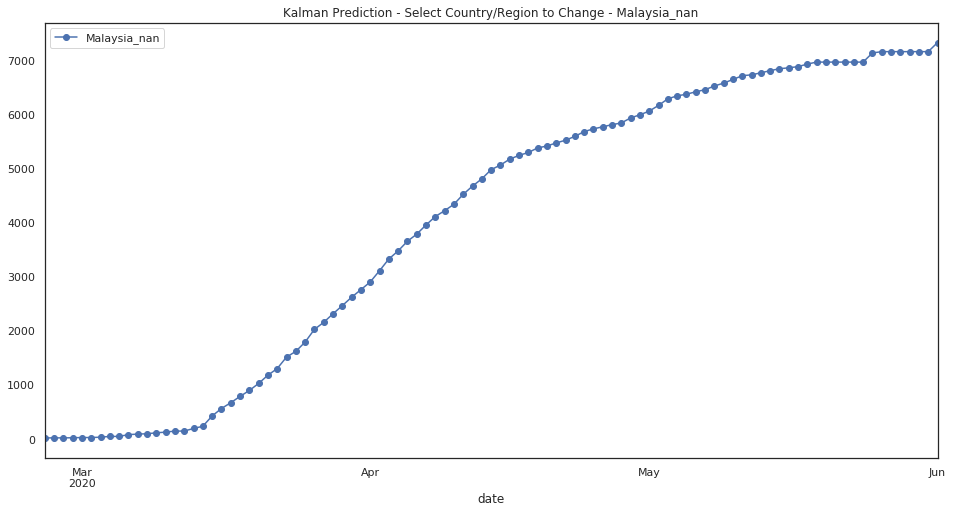

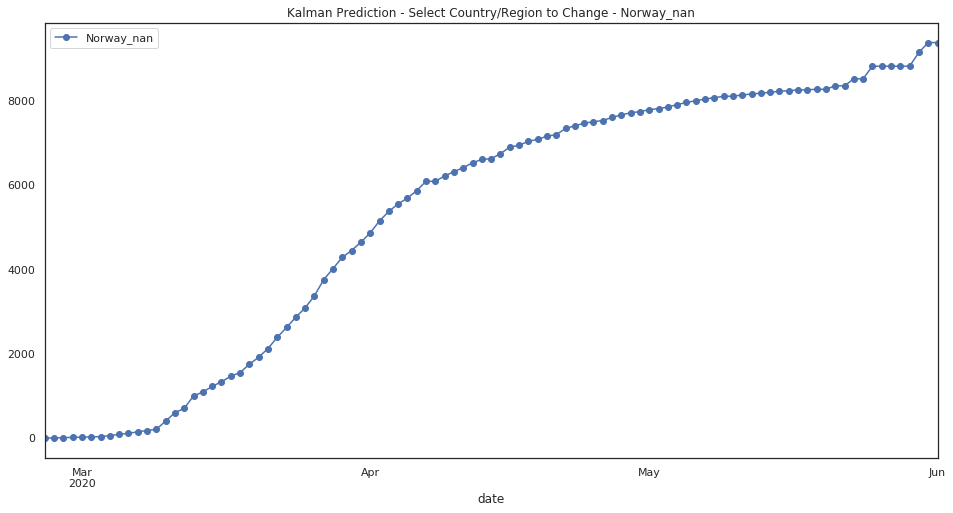

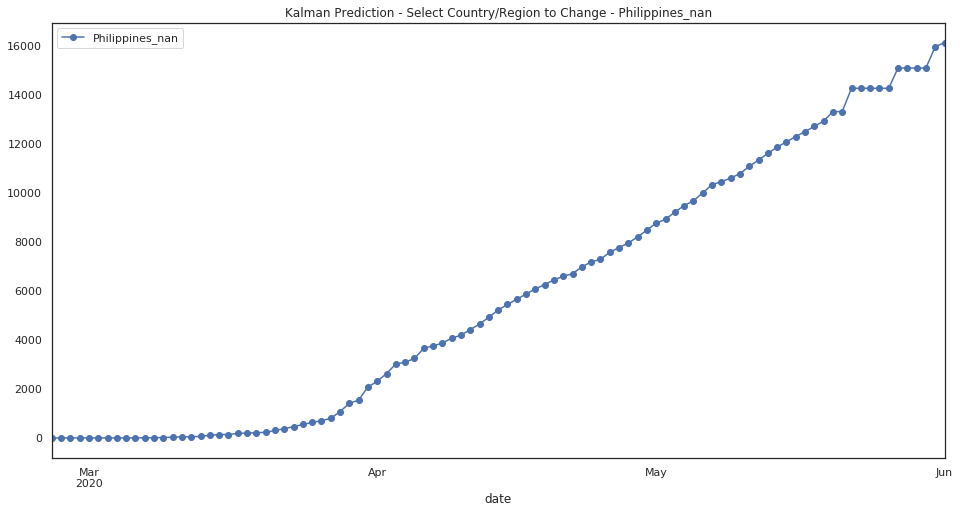

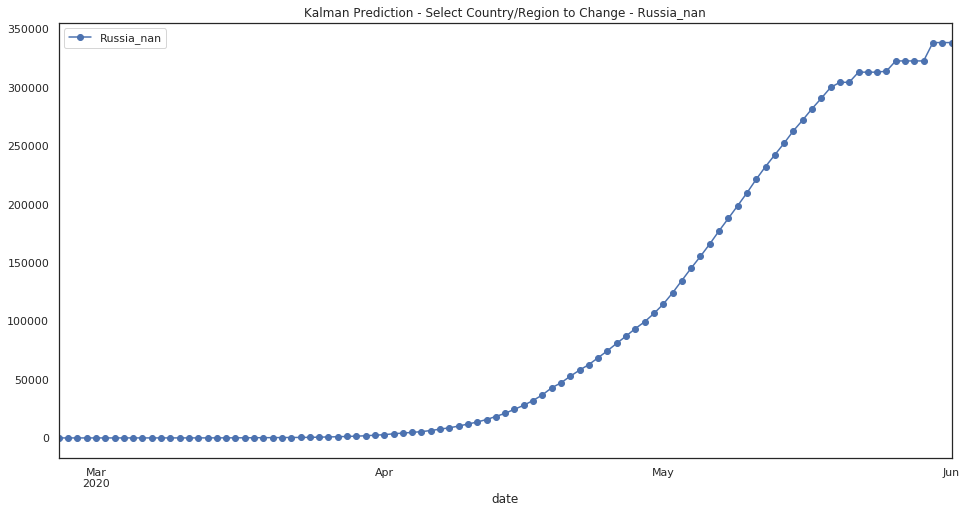

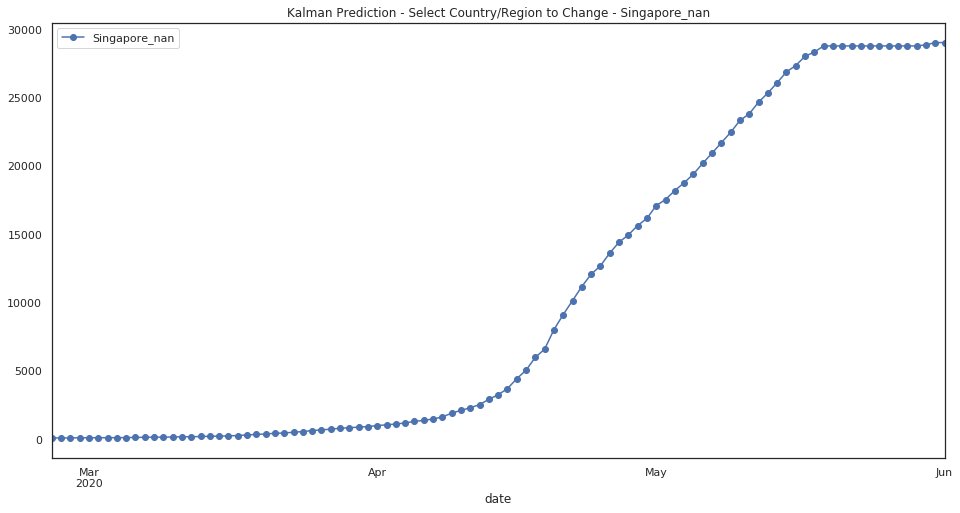

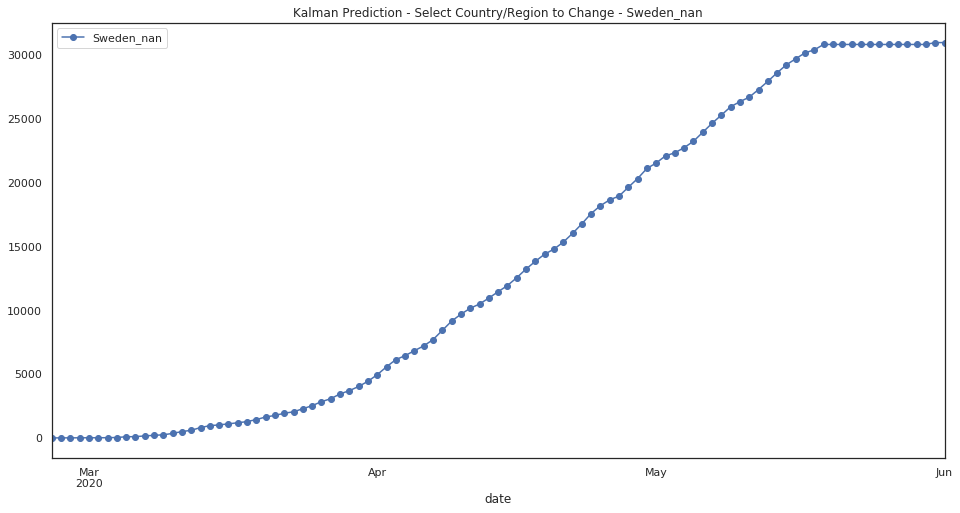

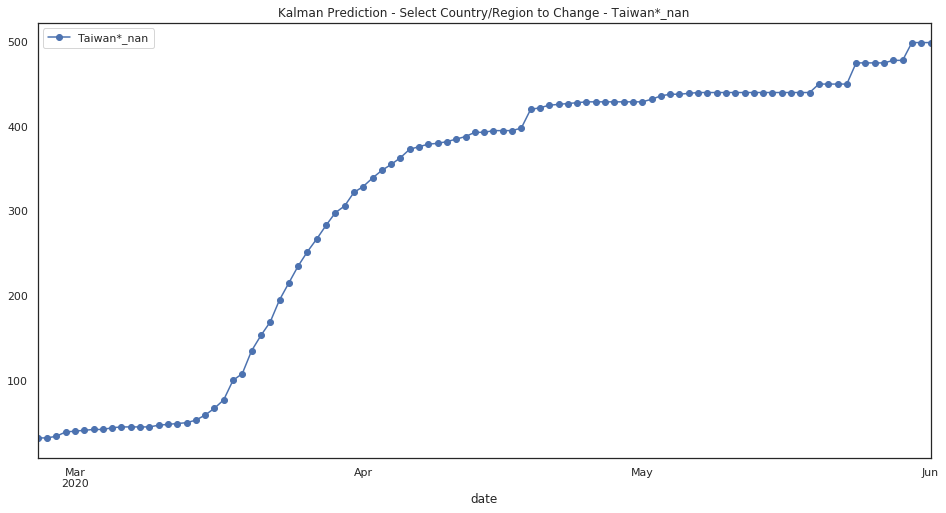

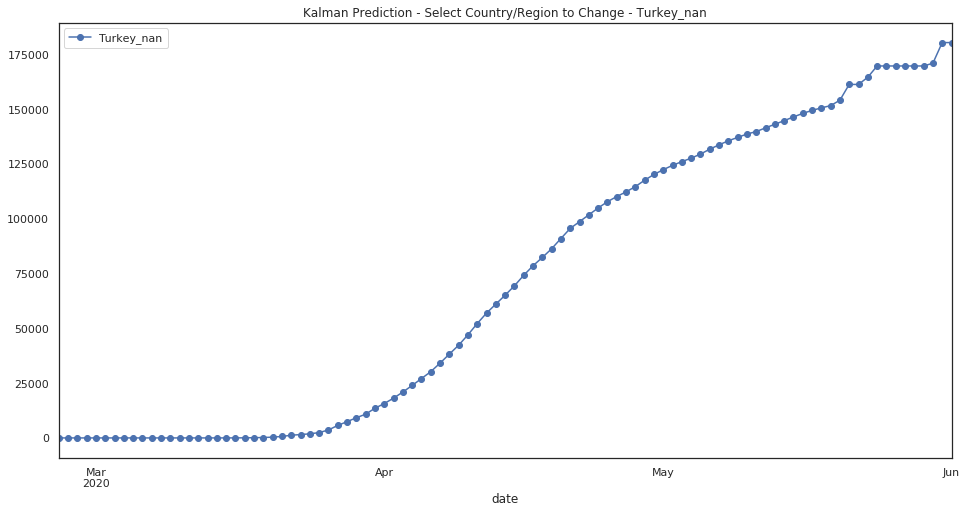

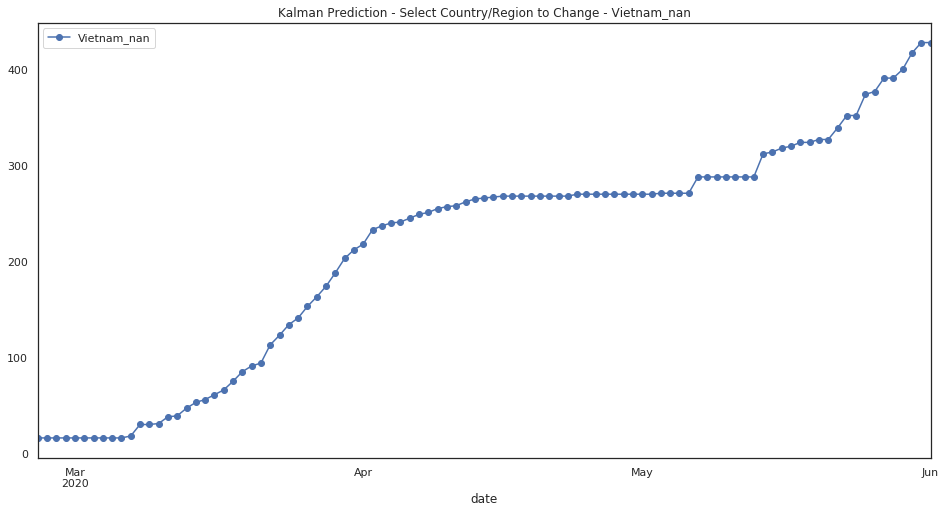

In [65]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [66]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-06-01 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             NaN       1854852.0
Brazil_nan                                    NaN        430441.0
Russia_nan                                    NaN        338359.0
United Kingdom_nan                            NaN        307110.0
Spain_nan                                     NaN        249762.0
Italy_nan                                     NaN        231626.0
France_nan                                    NaN        220027.0
Germany_nan                                   NaN        211770.0
Turkey_nan                                    NaN        180387.0
Peru_nan                                      NaN        169741.0
Iran_nan                                      NaN        150523.0
India_nan                                     NaN        136939.0
Saudi Arabia_nan                              NaN         81591.0
Chile_nan                                     NaN         77591.0
China_Hubei                                   NaN         76107.0
Mexico_nan                                    NaN         69124.0
Belgium_nan                                   NaN         62223.0
Pakistan_nan                                  NaN         57892.0
Netherlands_nan                               NaN         52946.0
Canada_Quebec                                 NaN         51032.0
Qatar_nan                                     NaN         45668.0
Ecuador_nan                                   NaN         41493.0
Belarus_nan                                   NaN         39936.0
Bangladesh_nan                                NaN         36980.0
Portugal_nan                                  NaN         35013.0
Canada_Ontario                                NaN         33464.0
Switzerland_nan                               NaN         32844.0
Sweden_nan                                    NaN         30945.0
United Arab Emirates_nan                      NaN         30660.0
Ireland_nan                                   NaN         29730.0
...                                           ...             ...
Dominica_nan                                  NaN            23.0
Saint Vincent and the Grenadines_nan          NaN            21.0
France_New Caledonia                          NaN            19.0
Fiji_nan                                      NaN            19.0
Saint Lucia_nan                               NaN            19.0
Namibia_nan                                   NaN            18.0
China_Qinghai                                 NaN            18.0
Saint Kitts and Nevis_nan                     NaN            17.0
Canada_Grand Princess                         NaN            15.0
United Kingdom_Falkland Islands (Malvinas)    NaN            14.0
United Kingdom_British Virgin Islands         NaN            14.0
Suriname_nan                                  NaN            13.0
United Kingdom_Turks and Caicos Islands       NaN            12.0
Denmark_Greenland                             NaN            12.0
Holy See_nan                                  NaN            12.0
Canada_Yukon                                  NaN            11.0
United Kingdom_Montserrat                     NaN            11.0
Comoros_nan                                   NaN            11.0
Seychelles_nan                                NaN            11.0
MS Zaandam_nan                                NaN             9.0
Papua New Guinea_nan                          NaN             8.0
France_Saint Barthelemy                       NaN             6.0
Western Sahara_nan                            NaN             6.0
Netherlands_Bonaire, Sint Eustatius and Saba  NaN             6.0
Canada_Northwest Territories                  NaN             5.0
United Kingdom_Anguilla                       NaN             3.0
China_Tibet                                   NaN             1.0
Canada_Diamond Princess                       NaN             1.0
France_Saint Pierre and Miquelon              NaN             1.0
Lesotho_nan           

In [67]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [68]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [69]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [70]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [71]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [72]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-02-26             34.0         16.0         57.0         16.0   
2020-02-27             58.0         16.0         66.0         16.0   
2020-02-28             19.0         16.0         39.0         16.0   
2020-02-29             20.0         16.0         41.0         16.0   
2020-03-01             26.0         16.0         42.0         16.0   
2020-03-02             28.0         16.0         44.0         17.0   
2020-03-03             28.0         16.0         19.0         18.0   
2020-03-04             21.0         16.0         54.0          1.0   
2020-03-05             22.0         16.0         93.0          1.0   
2020-03-06             23.0         16.0         92.0          4.0   
2020-03-07             28.0         16.0         83.0          4.0   
2020-03-08             33.0         16.0         81.0          4.0   
2020-03-09              4.0         17.0         89.0          4.0   
2020-03-10             43.0         26.0         66.0          5.0   
2020-03-11             52.0         10.0         63.0          5.0   
2020-03-12             42.0         19.0         66.0          5.0   
2020-03-13             50.0         61.0         69.0          5.0   
2020-03-14             52.0         47.0         80.0          5.0   
2020-03-15             57.0         51.0         95.0          5.0   
2020-03-16             57.0         53.0        105.0          6.0   
2020-03-17             66.0         98.0        111.0         26.0   
2020-03-18             63.0         69.0        122.0         39.0   
2020-03-19             58.0         73.0        139.0        235.0   
2020-03-20             59.0         76.0        144.0        242.0   
2020-03-21             60.0         82.0        179.0        211.0   
2020-03-22             72.0         94.0        266.0        253.0   
2020-03-23             80.0        113.0        315.0        317.0   
2020-03-24            106.0        133.0        332.0        267.0   
2020-03-25            139.0        159.0        365.0        204.0   
2020-03-26            139.0        188.0        420.0        230.0   
...                     ...          ...          ...          ...   
2020-05-04           3001.0        802.0       4731.0        748.0   
2020-05-05           3275.0        819.0       4914.0        750.0   
2020-05-06           3576.0        839.0       5090.0        751.0   
2020-05-07           3612.0        848.0       5251.0        751.0   
2020-05-08           3826.0        854.0       5454.0        752.0   
2020-05-09           4081.0        858.0       5639.0        752.0   
2020-05-10           4455.0        867.0       5808.0        754.0   
2020-05-11           4850.0        876.0       5957.0        755.0   
2020-05-12           5066.0        874.0       6132.0        755.0   
2020-05-13           5335.0        879.0       6322.0        758.0   
2020-05-14           5682.0        895.0       6518.0        760.0   
2020-05-15           6191.0        924.0       6710.0        761.0   
2020-05-16           6547.0        942.0       6902.0        761.0   
2020-05-17           6779.0        955.0       7103.0        761.0   
2020-05-18           7088.0        956.0       7290.0        761.0   
2020-05-19           7726.0        948.0       7453.0        761.0   
2020-05-20           7948.0        968.0       7498.0        761.0   
2020-05-21           7942.0        992.0       7402.0        761.0   
2020-05-22           8931.0        978.0       7453.0        761.0   
2020-05-23           9334.0       1002.0       7547.0        777.0   
2020-05-24           9541.0       1029.0       7887.0        777.0   
2020-05-25           9747.0       1012.0       8465.0        777.0   
2020-05-26           9536.0       1017.0       8256.0        777.0   
2020-05-27          10045.0       1015.0       8181.0        805.0   
2020-05-28

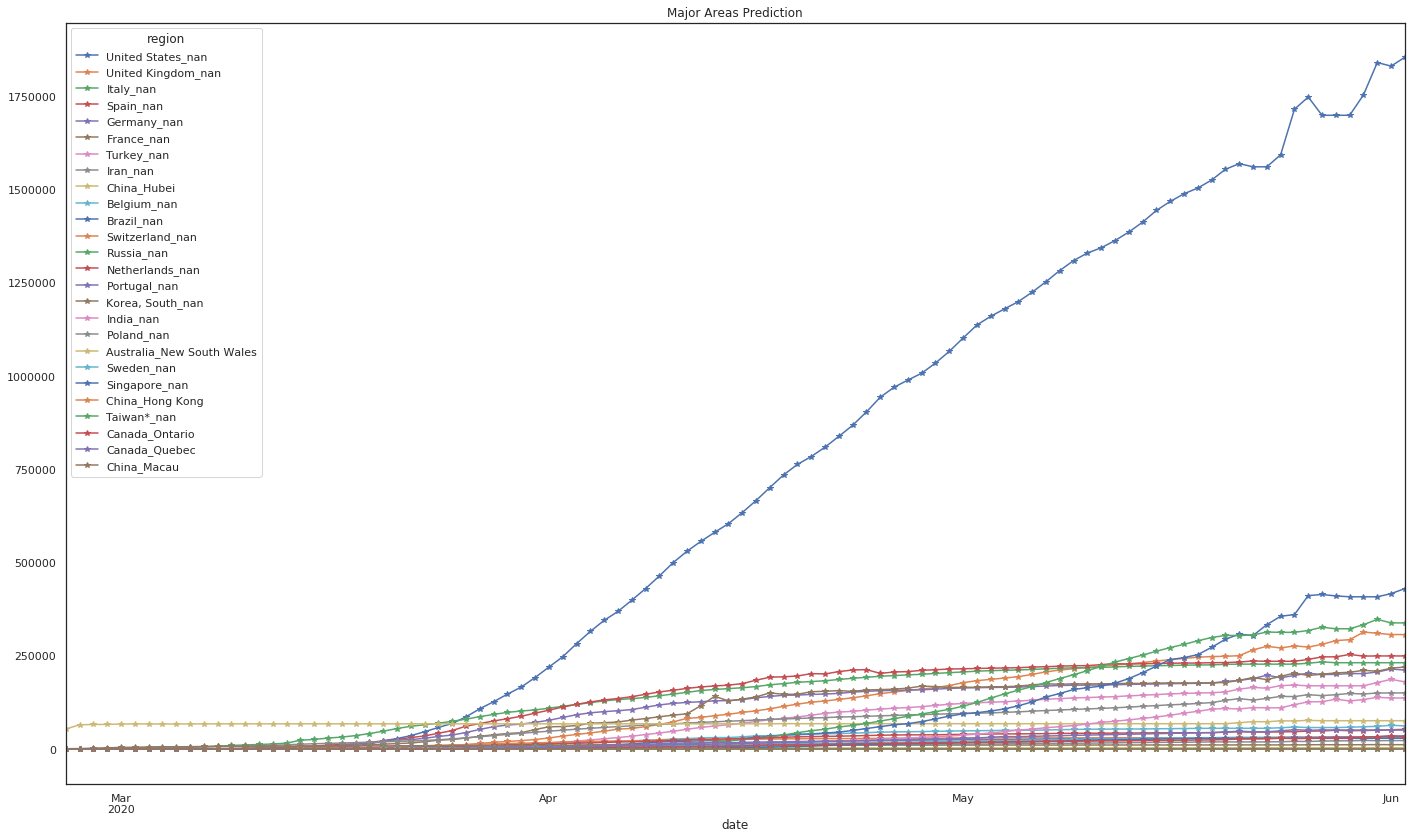

In [73]:
region=[
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',
        'Germany_nan',
        'France_nan',
        'Turkey_nan',
        'Iran_nan',
        'China_Hubei',
        'Belgium_nan',
        'Brazil_nan',
        'Switzerland_nan',
        'Russia_nan',
        'Netherlands_nan',
        'Portugal_nan',
        'Korea, South_nan',
        'India_nan',
        'Poland_nan',
        'Australia_New South Wales',
        'Sweden_nan',
        'Singapore_nan',
        'China_Hong Kong',
        'Taiwan*_nan',
        'Canada_Ontario',
        'Canada_Quebec',
        'China_Macau'
  ### JOAO - LIST of Countries - Finish here     
       ]

p=pred[region]
p[:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

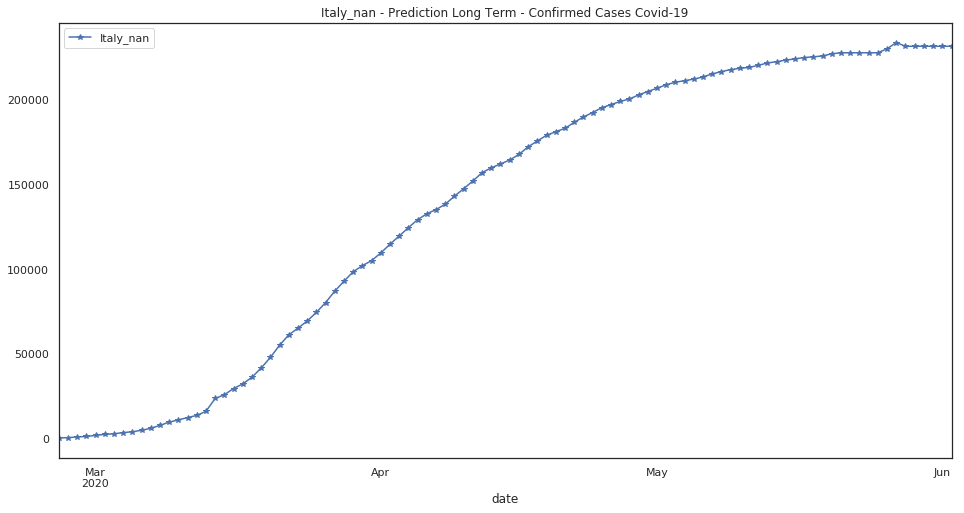

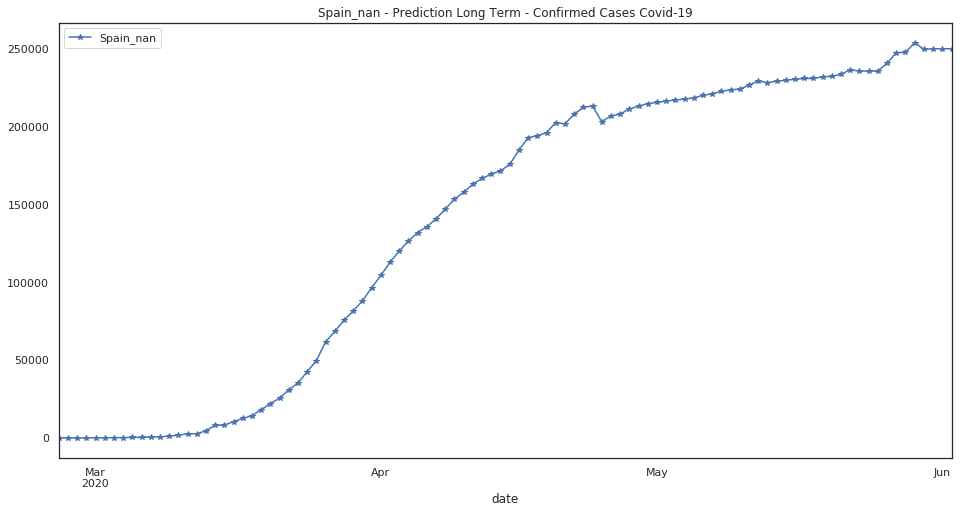

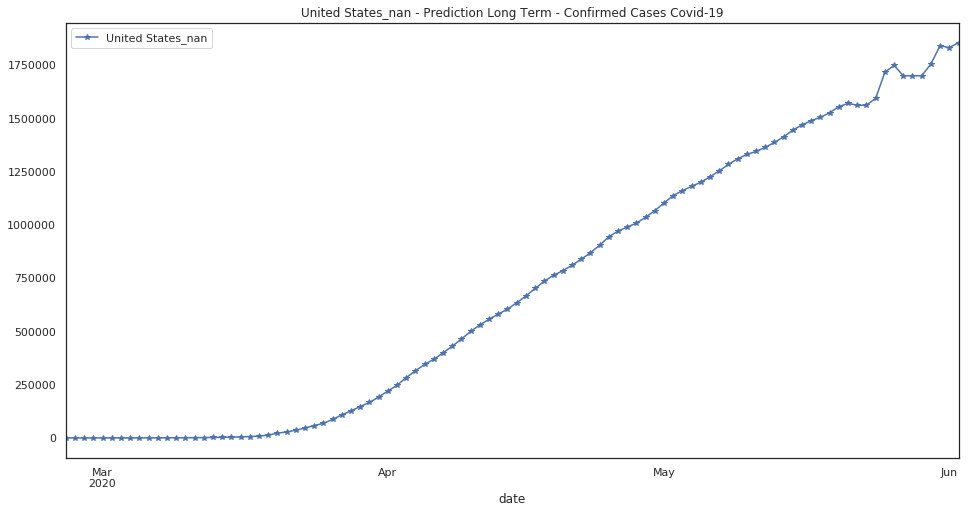

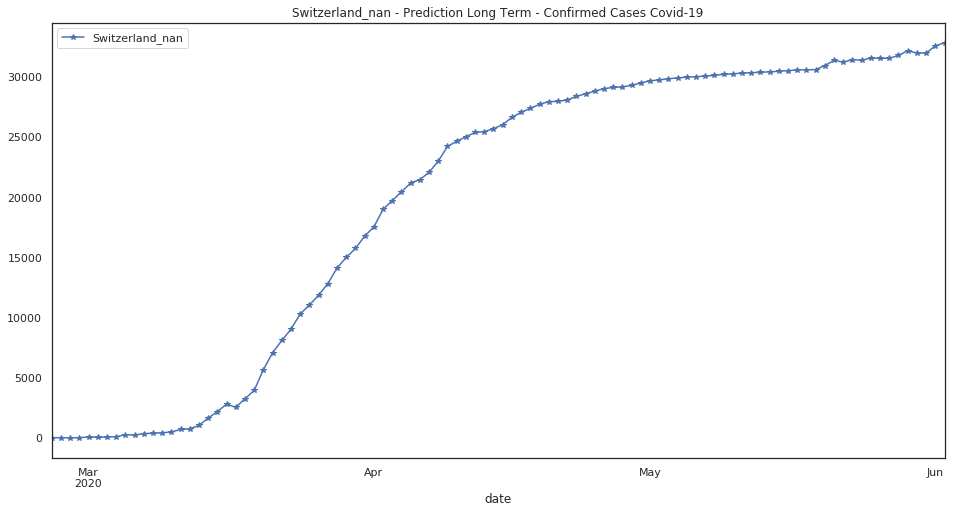

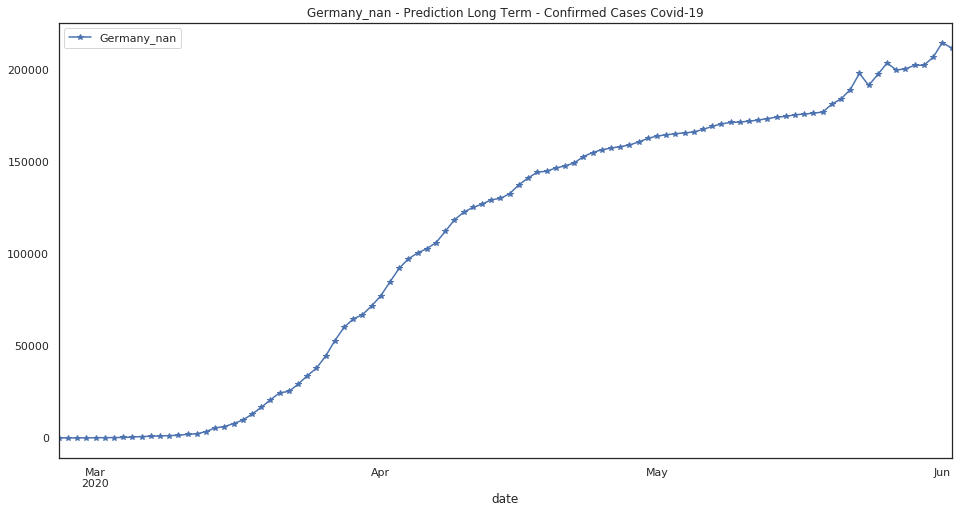

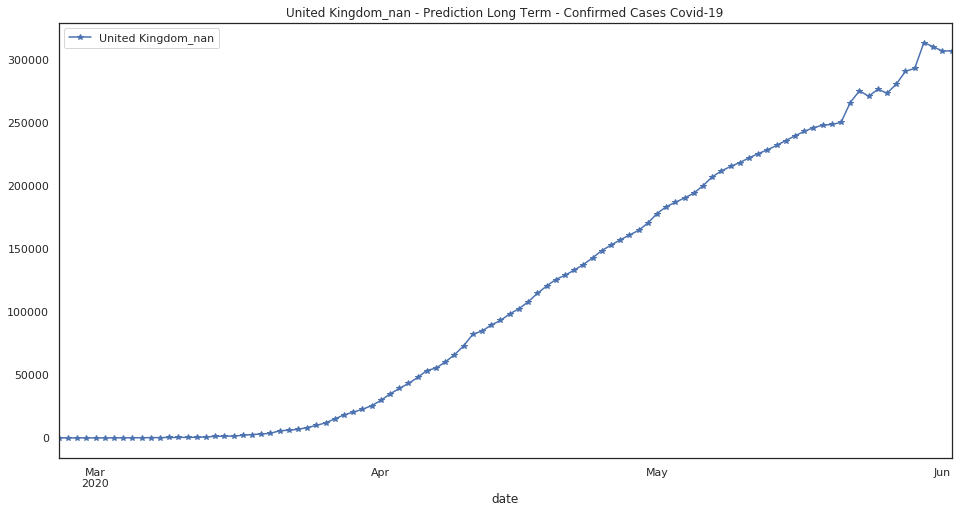

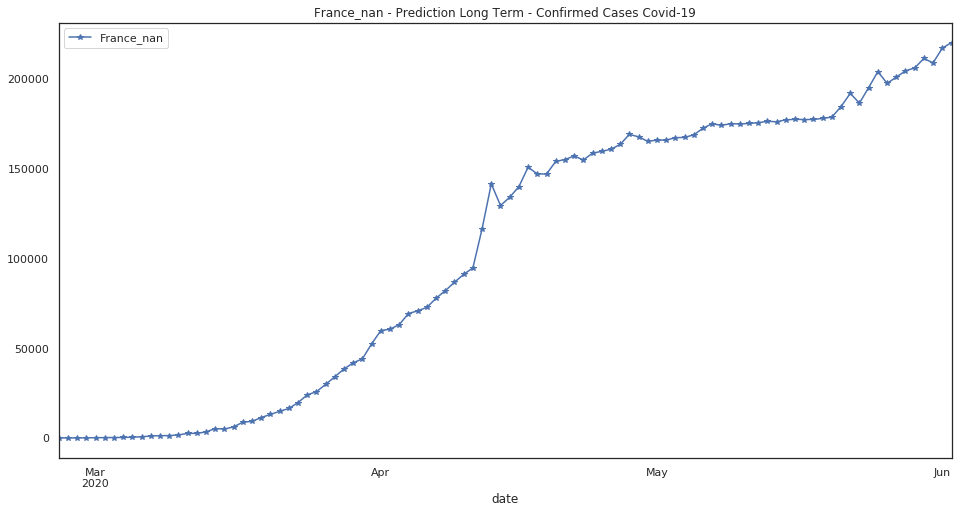

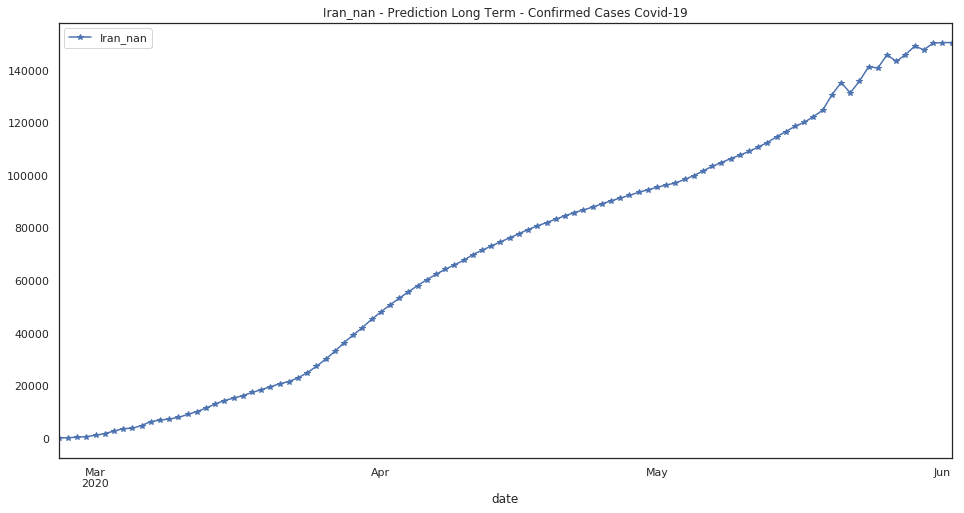

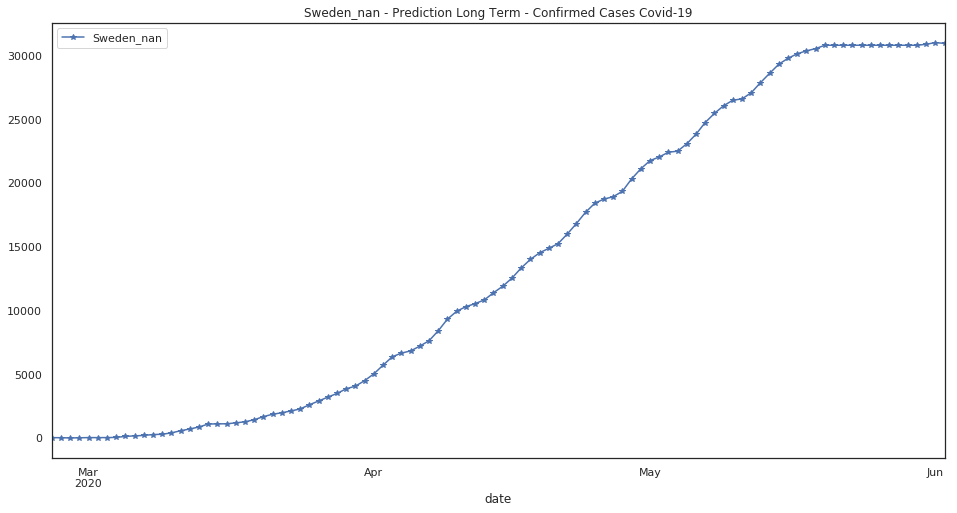

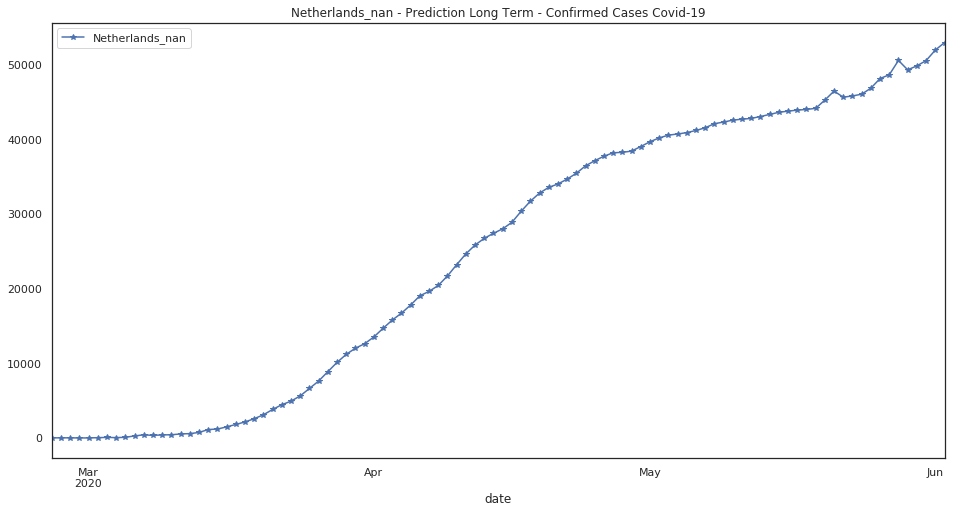

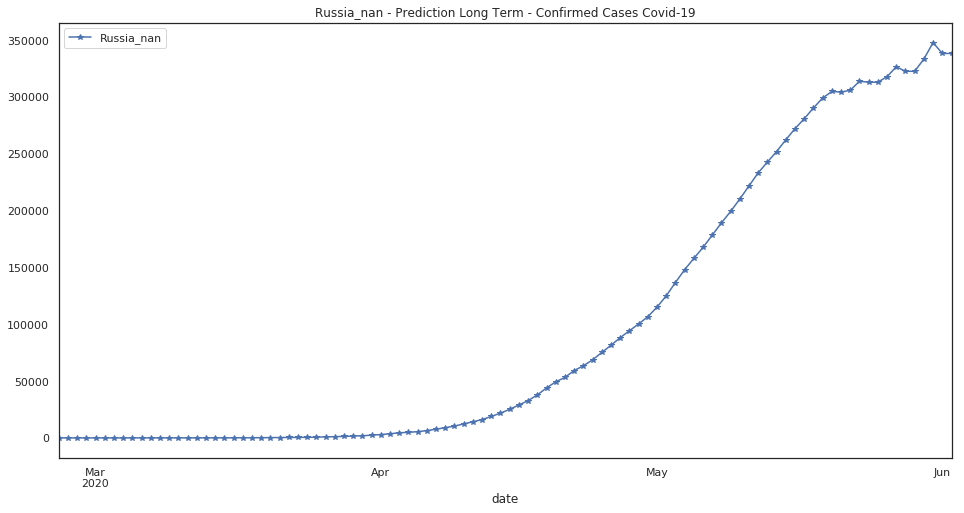

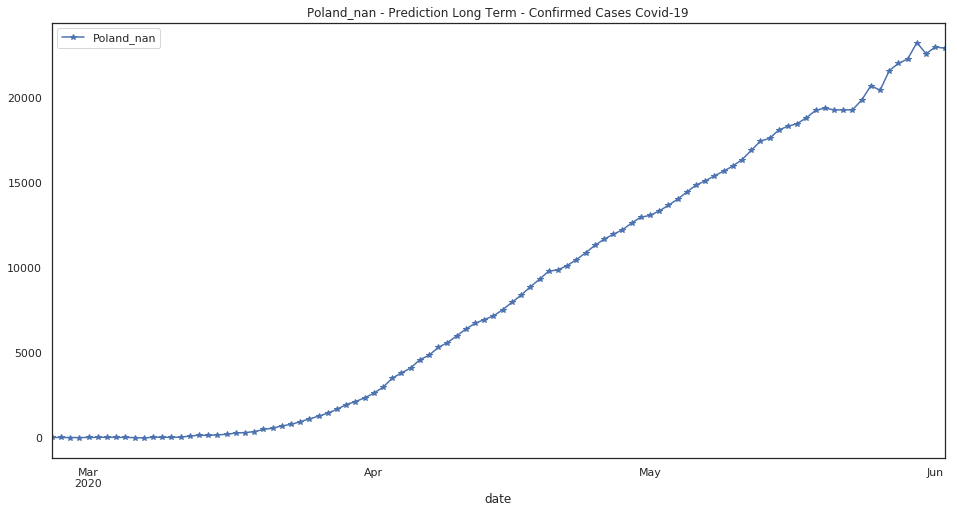

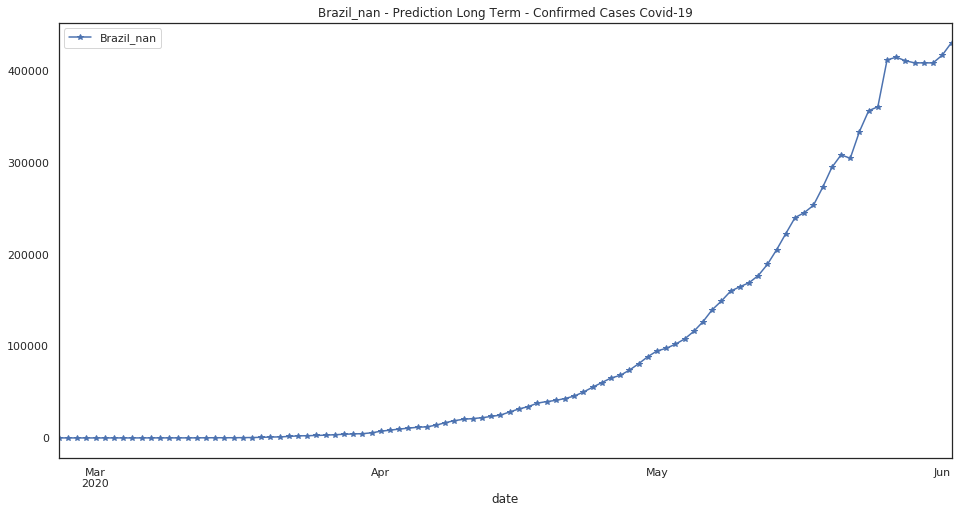

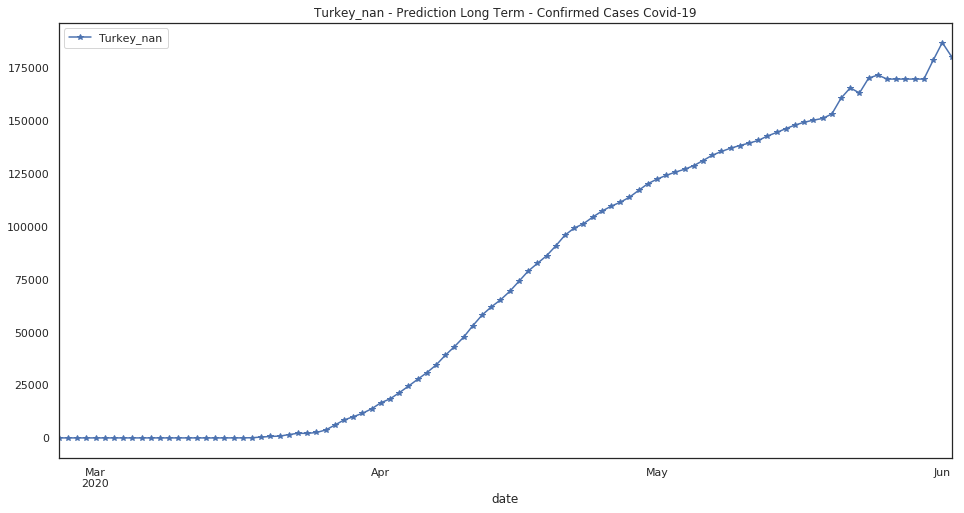

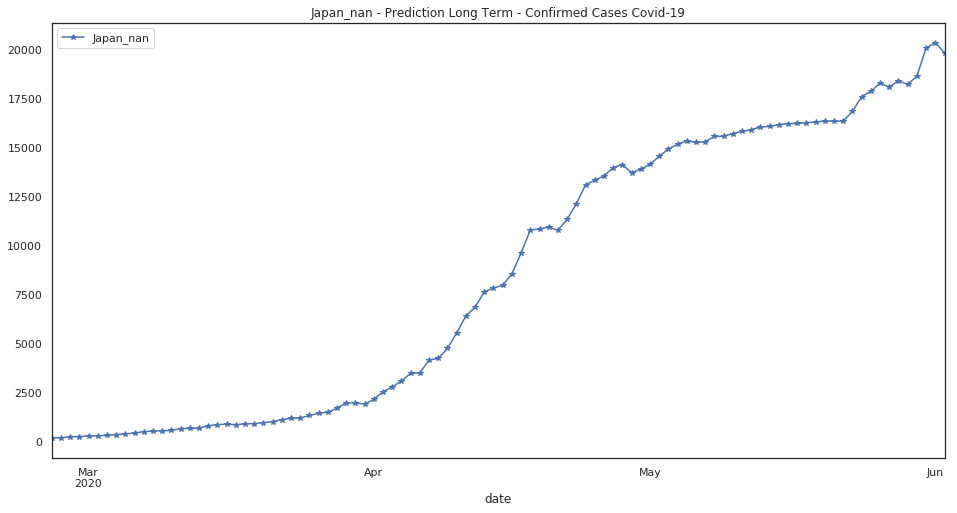

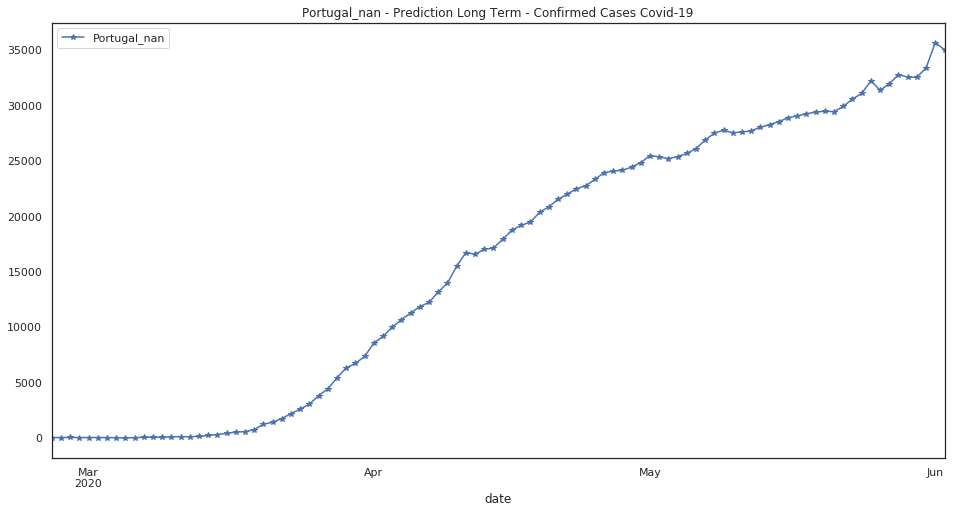

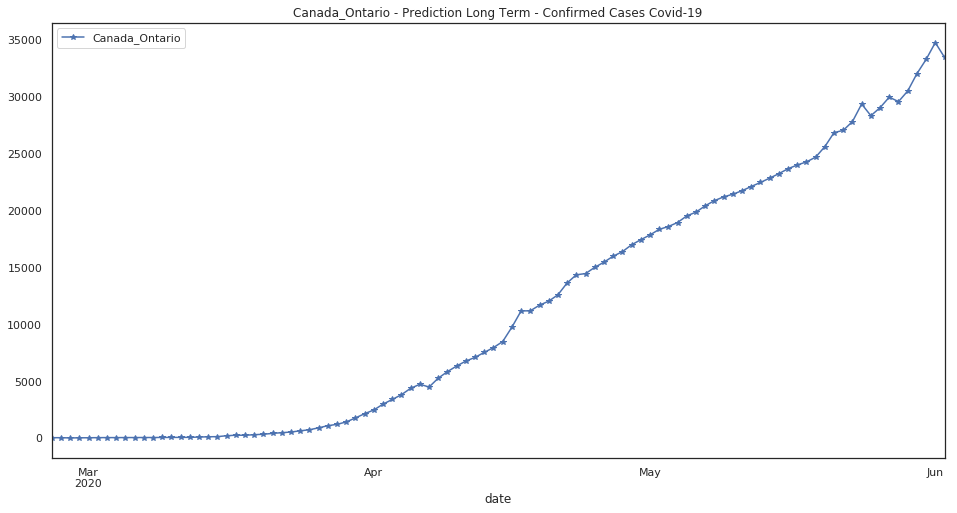

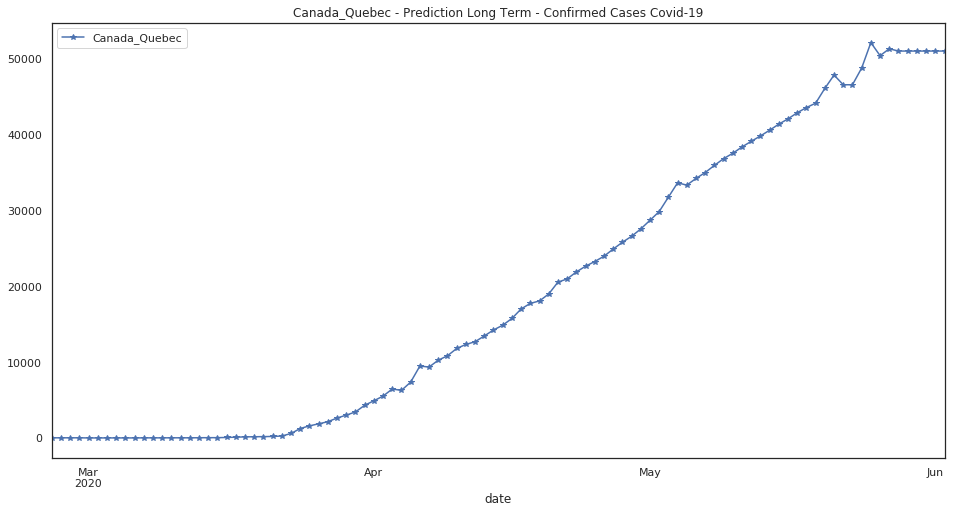

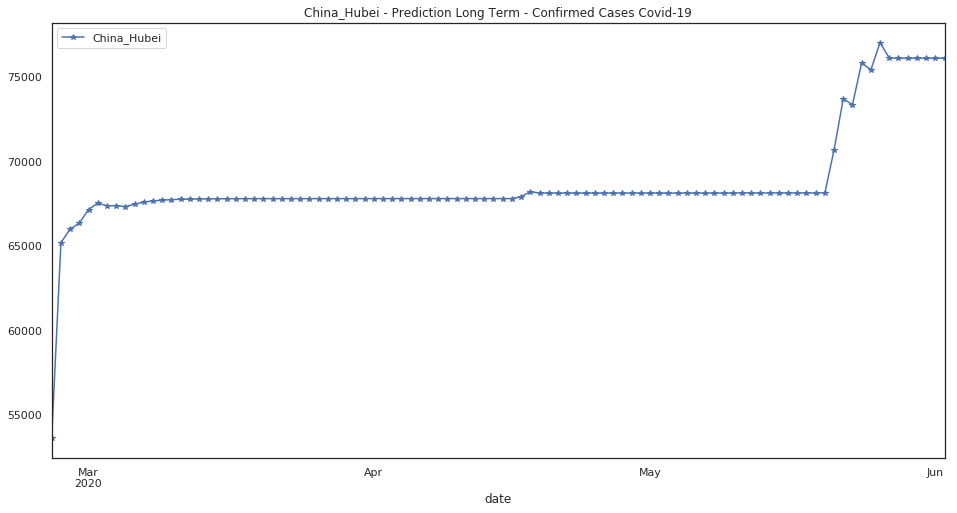

In [74]:
#
rgsx=['Italy_nan','Spain_nan','United States_nan','Switzerland_nan',
      'Germany_nan','United Kingdom_nan','France_nan','Iran_nan',
      'Sweden_nan','Netherlands_nan','Russia_nan','Poland_nan',
      'Brazil_nan','Turkey_nan','Japan_nan',
      'Portugal_nan','Canada_Ontario','Canada_Quebec','China_Hubei']
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

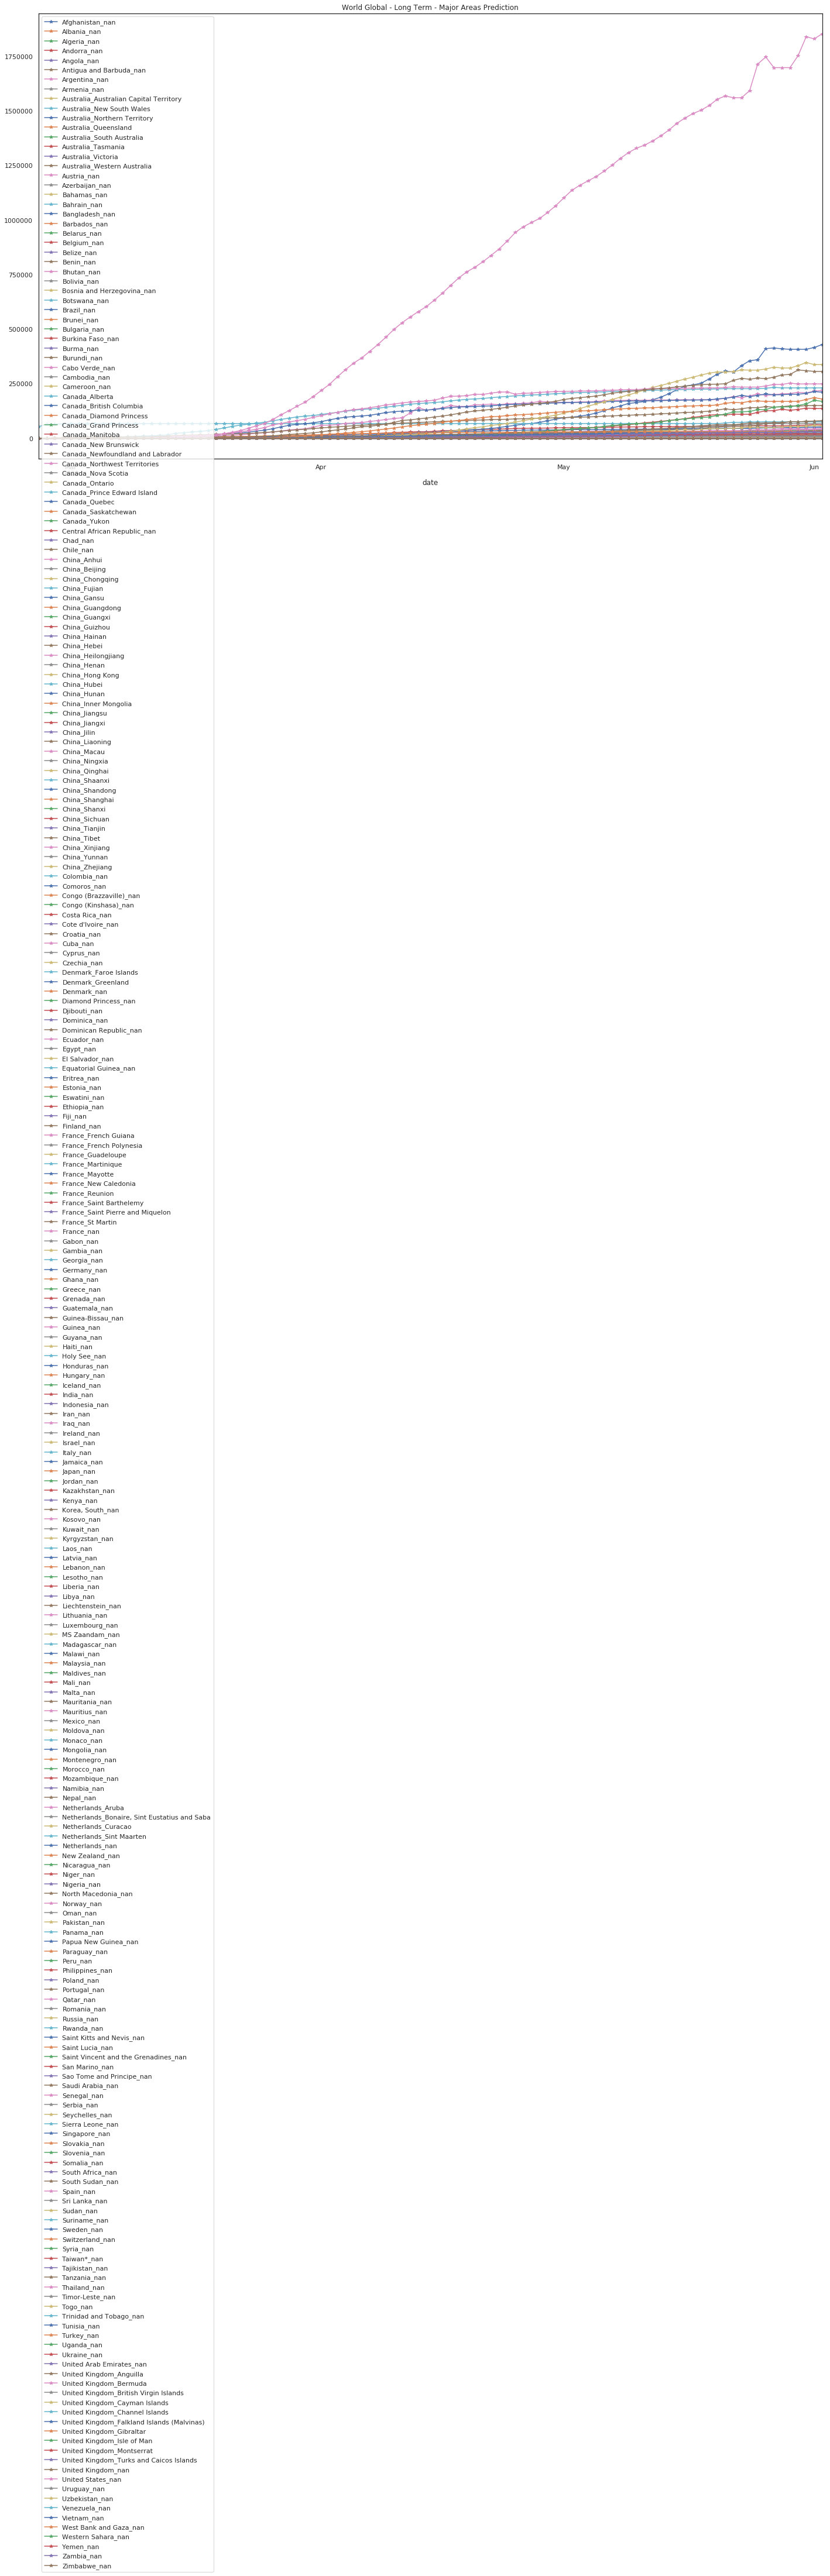

In [75]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [76]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [77]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-04-11            599.0        429.0       1901.0        601.0   
2020-04-12            646.0        451.0       1959.0        603.0   
2020-04-13            717.0        470.0       2047.0        643.0   
2020-04-14            770.0        488.0       2117.0        646.0   
2020-04-15            834.0        494.0       2218.0        659.0   
2020-04-16            904.0        525.0       2327.0        673.0   
2020-04-17            956.0        549.0       2487.0        673.0   
2020-04-18            996.0        558.0       2642.0        696.0   
2020-04-19           1020.0        562.0       2714.0        704.0   
2020-04-20           1081.0        585.0       2786.0        713.0   
2020-04-21           1115.0        614.0       2862.0        717.0   
2020-04-22           1225.0        642.0       2959.0        717.0   
2020-04-23           1339.0        671.0       3060.0        723.0   
2020-04-24           1436.0        692.0       3178.0        723.0   
2020-04-25           1519.0        712.0       3330.0        731.0   
2020-04-26           1617.0        741.0       3466.0        738.0   
2020-04-27           1733.0        735.0       3598.0        738.0   
2020-04-28           1938.0        746.0       3734.0        743.0   
2020-04-29           2012.0        763.0       3914.0        743.0   
2020-04-30           2216.0        774.0       4126.0        743.0   
2020-05-01           2471.0        779.0       4242.0        745.0   
2020-05-02           2556.0        787.0       4376.0        745.0   
2020-05-03           2752.0        794.0       4533.0        747.0   
2020-05-04           3001.0        802.0       4731.0        748.0   
2020-05-05           3275.0        819.0       4914.0        750.0   
2020-05-06           3576.0        839.0       5090.0        751.0   
2020-05-07           3612.0        848.0       5251.0        751.0   
2020-05-08           3826.0        854.0       5454.0        752.0   
2020-05-09           4081.0        858.0       5639.0        752.0   
2020-05-10           4455.0        867.0       5808.0        754.0   
2020-05-11           4850.0        876.0       5957.0        755.0   
2020-05-12           5066.0        874.0       6132.0        755.0   
2020-05-13           5335.0        879.0       6322.0        758.0   
2020-05-14           5682.0        895.0       6518.0        760.0   
2020-05-15           6191.0        924.0       6710.0        761.0   
2020-05-16           6547.0        942.0       6902.0        761.0   
2020-05-17           6779.0        955.0       7103.0        761.0   
2020-05-18           7088.0        956.0       7290.0        761.0   
2020-05-19           7726.0        948.0       7453.0        761.0   
2020-05-20           7948.0        968.0       7498.0        761.0   
2020-05-21           7942.0        992.0       7402.0        761.0   
2020-05-22           8931.0        978.0       7453.0        761.0   
2020-05-23           9334.0       1002.0       7547.0        777.0   
2020-05-24           9541.0       1029.0       7887.0        777.0   
2020-05-25           9747.0       1012.0       8465.0        777.0   
2020-05-26           9536.0       1017.0       8256.0        777.0   
2020-05-27          10045.0       1015.0       8181.0        805.0   
2020-05-28          10696.0       1015.0       8595.0        805.0   
2020-05-29          10542.0       1015.0       9116.0        805.0   
2020-05-30          11306.0       1015.0       8709.0        821.0   
2020-05-31          11394.0       1015.0       8709.0        821.0   
2020-06-01          12040.0       1015.0       8709.0        821.0   
2020-06-02          12094.0       1015.0       8709.0        821.0   

region      Angola_nan  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
date                                                                  

In [78]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [79]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [80]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [81]:
heatmap_m[:]

region        Lat        Long  \
0                                 Afghanistan_nan  33.000000   65.000000   
1                                     Albania_nan  41.153300   20.168300   
2                                     Algeria_nan  28.033900    1.659600   
3                                     Andorra_nan  42.506300    1.521800   
4                                      Angola_nan -11.202700   17.873900   
5                         Antigua and Barbuda_nan  17.060800  -61.796400   
6                                   Argentina_nan -38.416100  -63.616700   
7                                     Armenia_nan  40.069100   45.038200   
8          Australia_Australian Capital Territory -35.473500  149.012400   
9                       Australia_New South Wales -33.868800  151.209300   
10                   Australia_Northern Territory -12.463400  130.845600   
11                           Australia_Queensland -28.016700  153.400000   
12                      Australia_South Australia -34.928500  138.600700   
13                             Australia_Tasmania -41.454500  145.970700   
14                             Australia_Victoria -37.813600  144.963100   
15                    Australia_Western Australia -31.950500  115.860500   
16                                    Austria_nan  47.516200   14.550100   
17                                 Azerbaijan_nan  40.143100   47.576900   
18                                    Bahamas_nan  25.034300  -77.396300   
19                                    Bahrain_nan  26.027500   50.550000   
20                                 Bangladesh_nan  23.685000   90.356300   
21                                   Barbados_nan  13.193900  -59.543200   
22                                    Belarus_nan  53.709800   27.953400   
23                                    Belgium_nan  50.833300    4.000000   
24                                      Benin_nan   9.307700    2.315800   
25                                     Bhutan_nan  27.514200   90.433600   
26                                    Bolivia_nan -16.290200  -63.588700   
27                     Bosnia and Herzegovina_nan  43.915900   17.679100   
28                                     Brazil_nan -14.235000  -51.925300   
29                                     Brunei_nan   4.535300  114.727700   
..                                            ...        ...         ...   
238                               Timor-Leste_nan  -8.874217  125.727539   
239                                    Belize_nan  13.193900  -59.543200   
240                                      Laos_nan  19.856270  102.495496   
241                                     Libya_nan  26.335100   17.228331   
242                        West Bank and Gaza_nan  31.952200   35.233200   
243                             Guinea-Bissau_nan  11.803700  -15.180400   
244                                      Mali_nan  17.570692   -3.996166   
245                     Saint Kitts and Nevis_nan  17.357822  -62.782998   
246                  Canada_Northwest Territories  64.825500 -124.845700   
247                                  Canada_Yukon  64.282300 -135.000000   
248                                    Kosovo_nan  42.602636   20.902977   
249                                     Burma_nan  21.916200   95.956000   
250                       United Kingdom_Anguilla  18.220600  -63.068600   
251         United Kingdom_British Virgin Islands  18.420700  -64.640000   
252       United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
253                                MS Zaandam_nan   0.000000    0.000000   
254                                  Botswana_nan -22.328500   24.684900   
255                                   Burundi_nan  -3.373100   29.918900   
256                              Sierra Leone_nan   8.460555  -11.779889   
257  Netherlands_Bonaire, Sint Eustatius and Saba  12.178400  -68.238500   
258                                    Malawi_nan -13.254308   34.301525   
259    United K

In [82]:
#!pip install folium
import folium
import re

lat=46.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')

for lat,lng,num,totpred in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]] ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' pred_confirmed='+str(round(totpred))+' date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [83]:
#
region_m2=region + ['Andorra_nan','Monaco_nan','San Marino_nan','Ireland_nan','Slovenia_nan','Slovakia_nan','Czechia_nan',
                    'Hungary_nan','Ukraine_nan','Croatia_nan','Finland_nan','Norway_nan','Estonia_nan','Denmark_nan','Greece_nan',
                    'Chile_nan','Argentina_nan','Mexico_nan','Ecuador_nan','Peru_nan','Colombia_nan','Costa Rica_nan',
                    'South Africa_nan','Morocco_nan','Algeria_nan','Saudi Arabia_nan','Israel_nan','Japan_nan',
                    'Singapore_nan','Canada_British Columbia']
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                     region      Lat      Long  2020-02-26 00:00:00  \
0       2                Algeria_nan  28.0339    1.6596                 57.0   
1       3                Andorra_nan  42.5063    1.5218                 16.0   
2       6              Argentina_nan -38.4161  -63.6167                 16.0   
3       9  Australia_New South Wales -33.8688  151.2093                 62.0   
4      23                Belgium_nan  50.8333    4.0000                 28.0   
5      28                 Brazil_nan -14.2350  -51.9253                 56.0   
6      36    Canada_British Columbia  49.2827 -123.1207                 35.0   
7      42             Canada_Ontario  51.2538  -85.3232                 30.0   
8      44              Canada_Quebec  52.9399  -73.5491                 16.0   
9      48                  Chile_nan -35.6751  -71.5430                 16.0   
10     61            China_Hong Kong  22.3000  114.2000                111.0   
11     62                China_Hubei  30.9756  112.2707              53649.0   
12     69                China_Macau  22.1667  113.5500                 51.0   
13     82               Colombia_nan   4.5709  -74.2973                 16.0   
14     85             Costa Rica_nan   9.7489  -83.7534                 16.0   
15     87                Croatia_nan  45.1000   15.2000                 40.0   
16     91                Czechia_nan  49.8175   15.4730                 16.0   
17     94                Denmark_nan  56.2639    9.5018                 16.0   
18     97                Ecuador_nan  -1.8312  -78.1834                 16.0   
19    102                Estonia_nan  58.5953   25.0136                 16.0   
20    106                Finland_nan  64.0000   26.0000                 31.0   
21    116                 France_nan  46.2276    2.2137                 49.0   
22    121                Germany_nan  51.0000    9.0000                 46.0   
23    123                 Greece_nan  39.0742   21.8243                 50.0   
24    130                Hungary_nan  47.1625   19.5033                 16.0   
25    132                  India_nan  21.0000   78.0000                 70.0   
26    134                   Iran_nan  32.0000   53.0000                171.0   
27    136                Ireland_nan  53.1424   -7.6921                 16.0   
28    137                 Israel_nan  31.0000   35.0000                 33.0   
29    138                  Italy_nan  43.0000   12.0000                408.0   
30    140                  Japan_nan  36.0000  138.0000                195.0   
31    144           Korea, South_nan  36.0000  128.0000               1064.0   
32    160                 Mexico_nan  23.6345 -102.5528                 16.0   
33    162                 Monaco_nan  43.7333    7.4167                 16.0   
34    165                Morocco_nan  31.7917   -7.0926                 16.0   
35    171            Netherlands_nan  52.1326    5.2913                 16.0   
36    177                 Norway_nan  60.4720    8.4689                 28.0   
37    183                   Peru_nan  -9.1900  -75.0152                 16.0   
38    185                 Poland_nan  51.9194   19.1451                 32.0   
39    186               Portugal_nan  39.3999   -8.2245                 44.0   
40    189                 Russia_nan  60.0000   90.0000                 28.0   
41    193             San Marino_nan  43.9424   12.4578                 16.0   
42    194           Saudi Arabia_nan  24.0000   45.0000                 16.0   
43    198              Singapore_nan   1.2833  103.8333                129.0   
44    199               Slovakia_nan  48.6690   19.6990                 16.0   
45    200               Slovenia_nan  46.1512   14.9955                 16.0   
46    202           South Africa_nan -30.5595   22.9375                 16.0   
47    203                  Spain_nan  40.0000   -4.0000                 54.0   
48    207                 Sweden_nan  63.0000   16.0000                 31.0   
49  

In [84]:
import folium
import re

lat=46.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')

for lat2,lng2,num2,totpred2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]] ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' pred_confirmed='+str(round(totpred2))+' date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [85]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [86]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March and now April!")
print(" April-May-June are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March and now April!
 April-May-June are going to be hard with this Global Lock-Down!


In [87]:
exit()

H2O session _sid_84cd closed.


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
